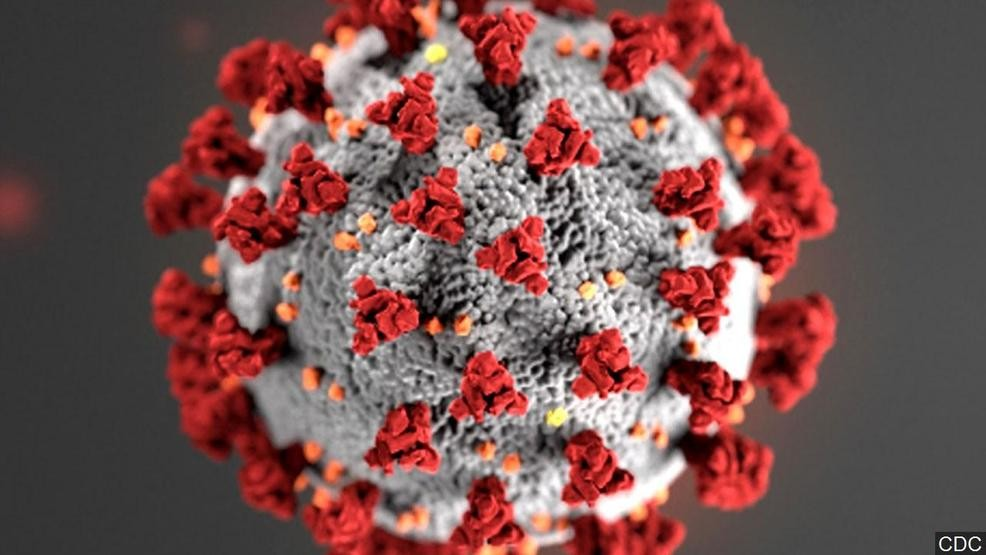

# What is Coronavirus
Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.

# What is Covid19?
COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.

# What are the symptoms of COVID-19?
The most common symptoms of COVID-19 are fever, tiredness, and dry cough. Some patients may have aches and pains, nasal congestion, runny nose, sore throat or diarrhea. These symptoms are usually mild and begin gradually. Some people become infected but don’t develop any symptoms and don't feel unwell. Most people (about 80%) recover from the disease without needing special treatment. Around 1 out of every 6 people who gets COVID-19 becomes seriously ill and develops difficulty breathing. Older people, and those with underlying medical problems like high blood pressure, heart problems or diabetes, are more likely to develop serious illness. People with fever, cough and difficulty breathing should seek medical attention.
[Source](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

# About
* I will keep on adding analysis and predictions
* Want to contribute to the COVID-19 research as much as possible
* For now I have seggregated notebook in 2 parts
    * [Exploratory Analysis](https://www.kaggle.com/anujgupta872003/covid-19-india-data-analysis-and-forecasting/notebook#Exploratory-Analysis)
    * [Prediction](https://www.kaggle.com/anujgupta872003/covid-19-india-data-analysis-and-forecasting/notebook#Predictions)    
        * [Exponential Forecasting Model Fitting](https://www.kaggle.com/anujgupta872003/covid-19-india-data-analysis-and-forecasting/notebook#Exponential-Forecasting-Model-Fitting)
        * [ARIMA/SARIMA Model Fitting](https://www.kaggle.com/anujgupta872003/covid-19-india-data-analysis-and-forecasting/notebook#ARIMA/SARIMA-Model-Fitting)        

In [1]:
library(tidyverse)
library(magrittr)
library(astsa)
library(forecast) 
options(warn = -1)
options(repr.plot.width = 8, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.0          ✔ dplyr   0.8.5     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




# Exploratory Analysis

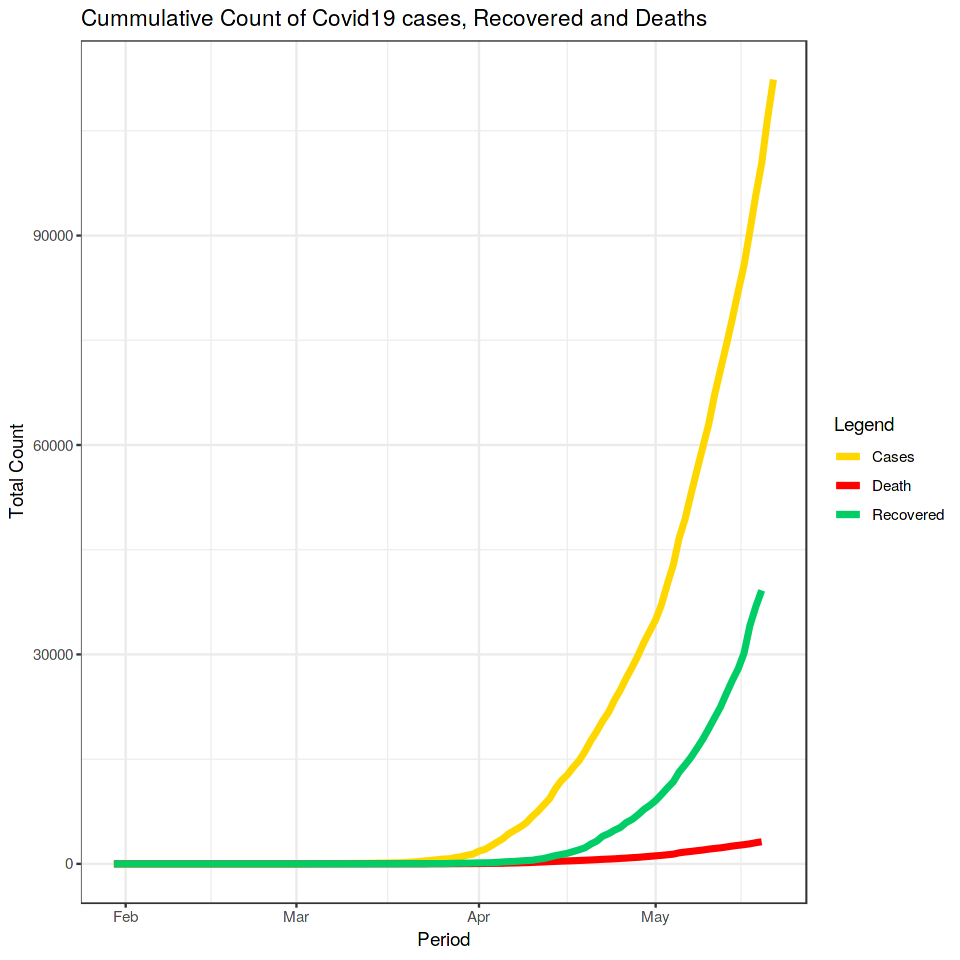

In [2]:
info_cov_india<-read.csv("../input/covid19-in-india/covid_19_india.csv",stringsAsFactors = F)

info_cov_india$Date<-as.Date.character(info_cov_india$Date,format = c("%d/%m/%y"))
info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(Date)%>% summarize(cured=sum(Cured),deaths=sum(Deaths),case=sum(Confirmed))
ggplot(info_cov_india1,aes(x=Date))+geom_line(aes(y=case,color="Cases"), size=1.5) + geom_line(aes(y=deaths,color="Death"), size=1.5)+ geom_line(aes(y=cured,color="Recovered"), size=1.5)+theme_bw() +ylab("Total Count")+xlab("Period")+ labs(title="Cummulative Count of Covid19 cases, Recovered and Deaths",color = "Legend")+scale_color_manual(values = c("gold","red","springgreen3"))

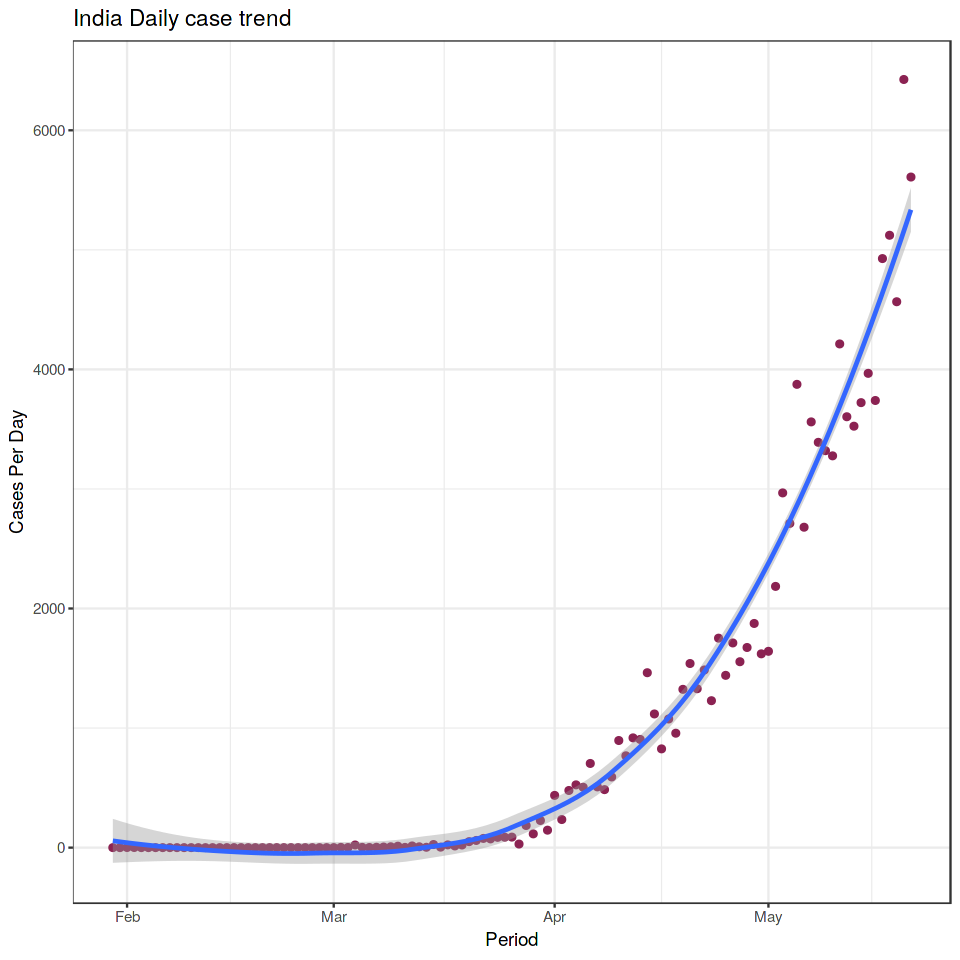

In [3]:
info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(Date)%>% summarize(cured=sum(Cured),deaths=sum(Deaths),case=sum(Confirmed))
info_cov_india1<-arrange(info_cov_india1,Date)%>%mutate(per_day_case = c(0,diff(case)))

ggplot(info_cov_india1,aes(x=Date,y=per_day_case))+geom_point(color="violetred4")+geom_smooth(method="loess", formula=y~x)+theme_bw()+xlab("Period")+ylab("Cases Per Day")+labs(title="India Daily case trend")


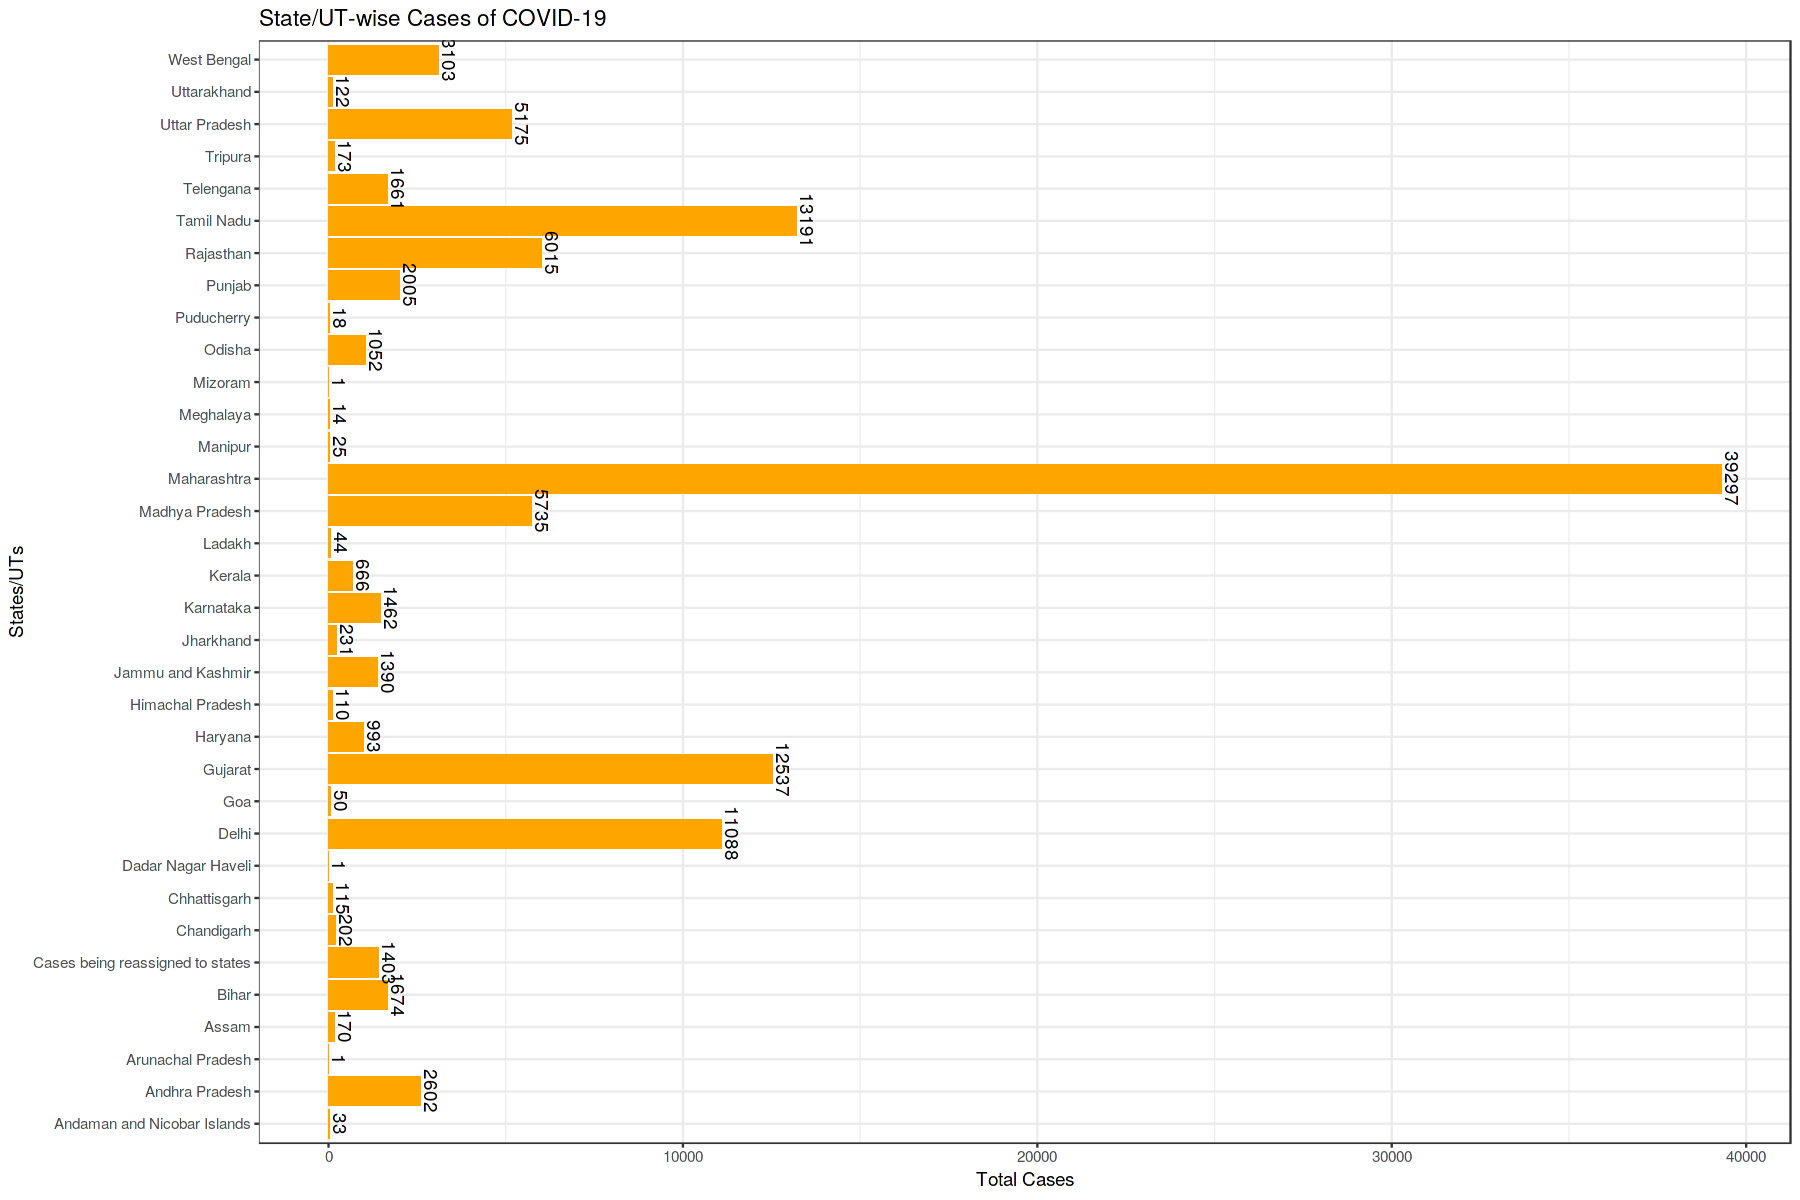

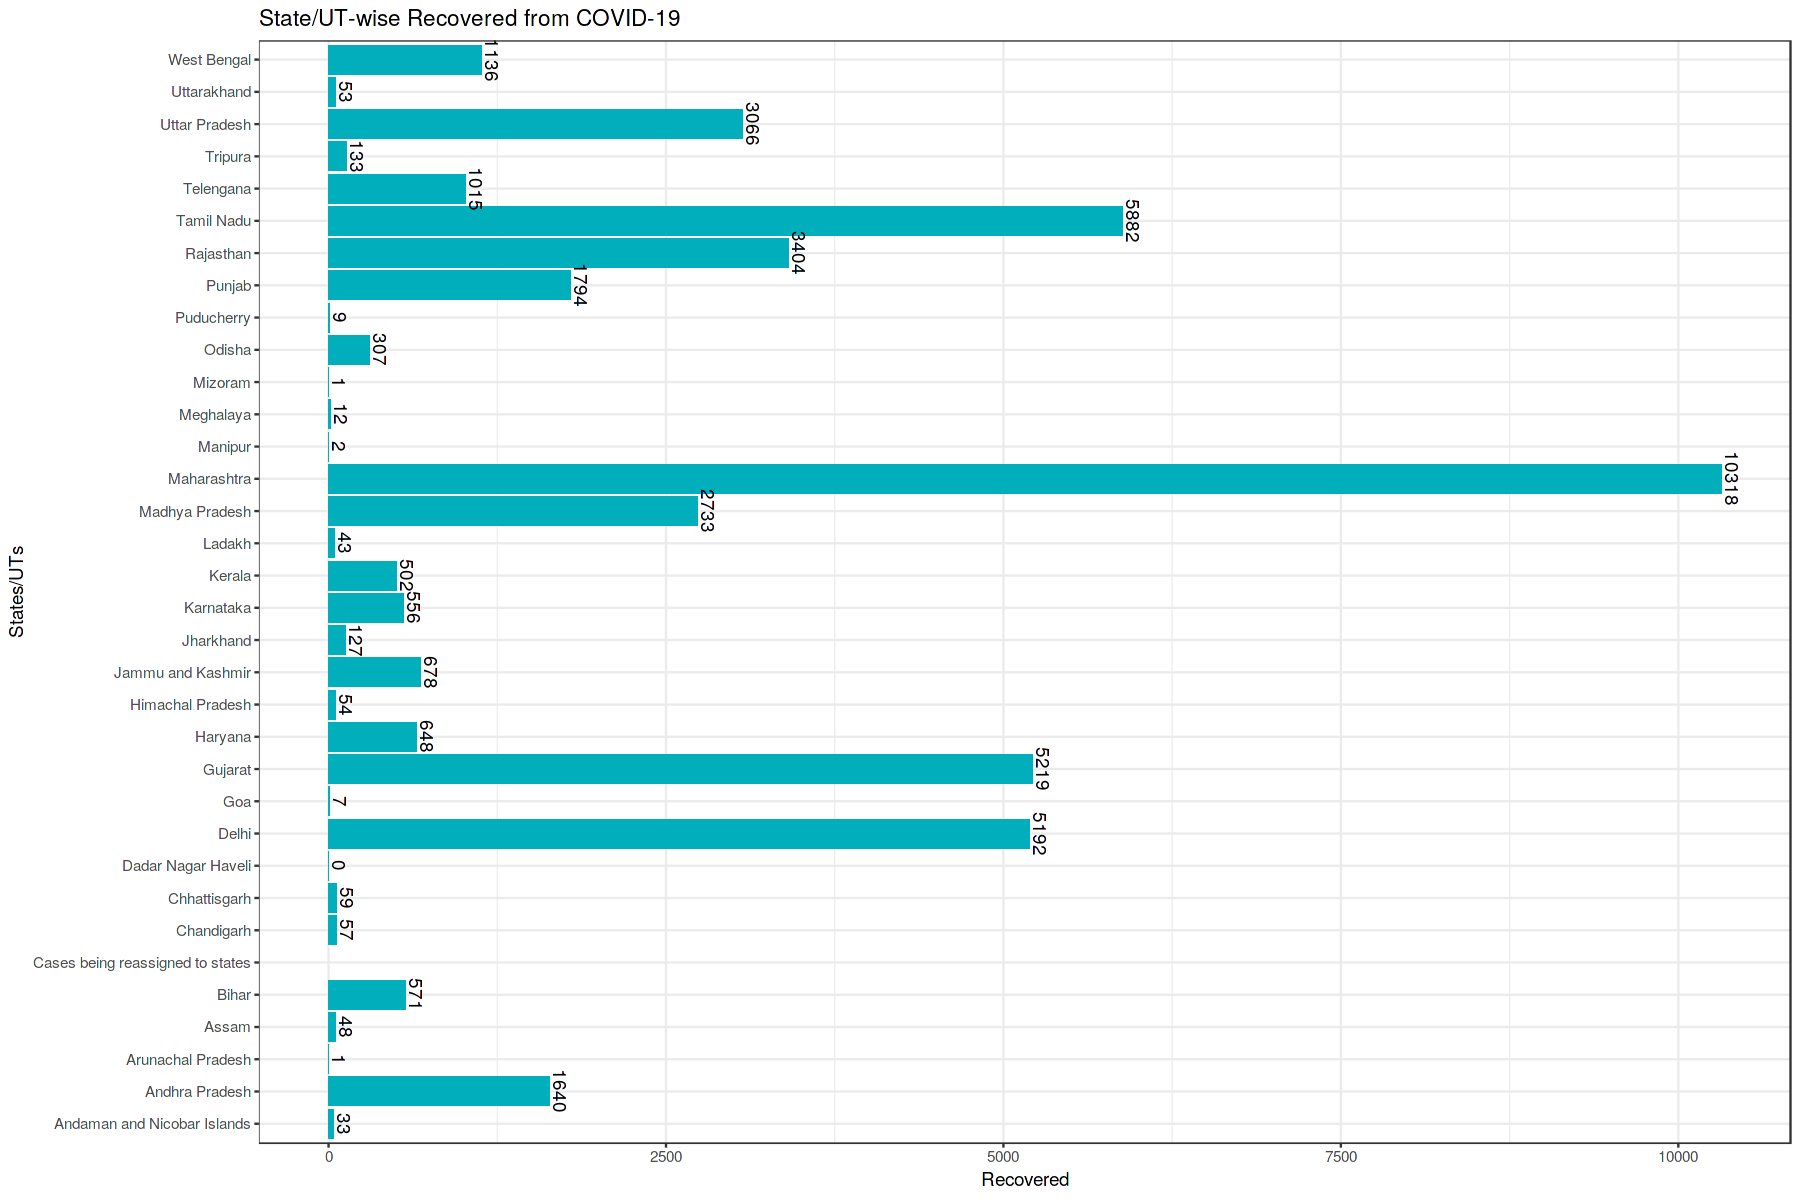

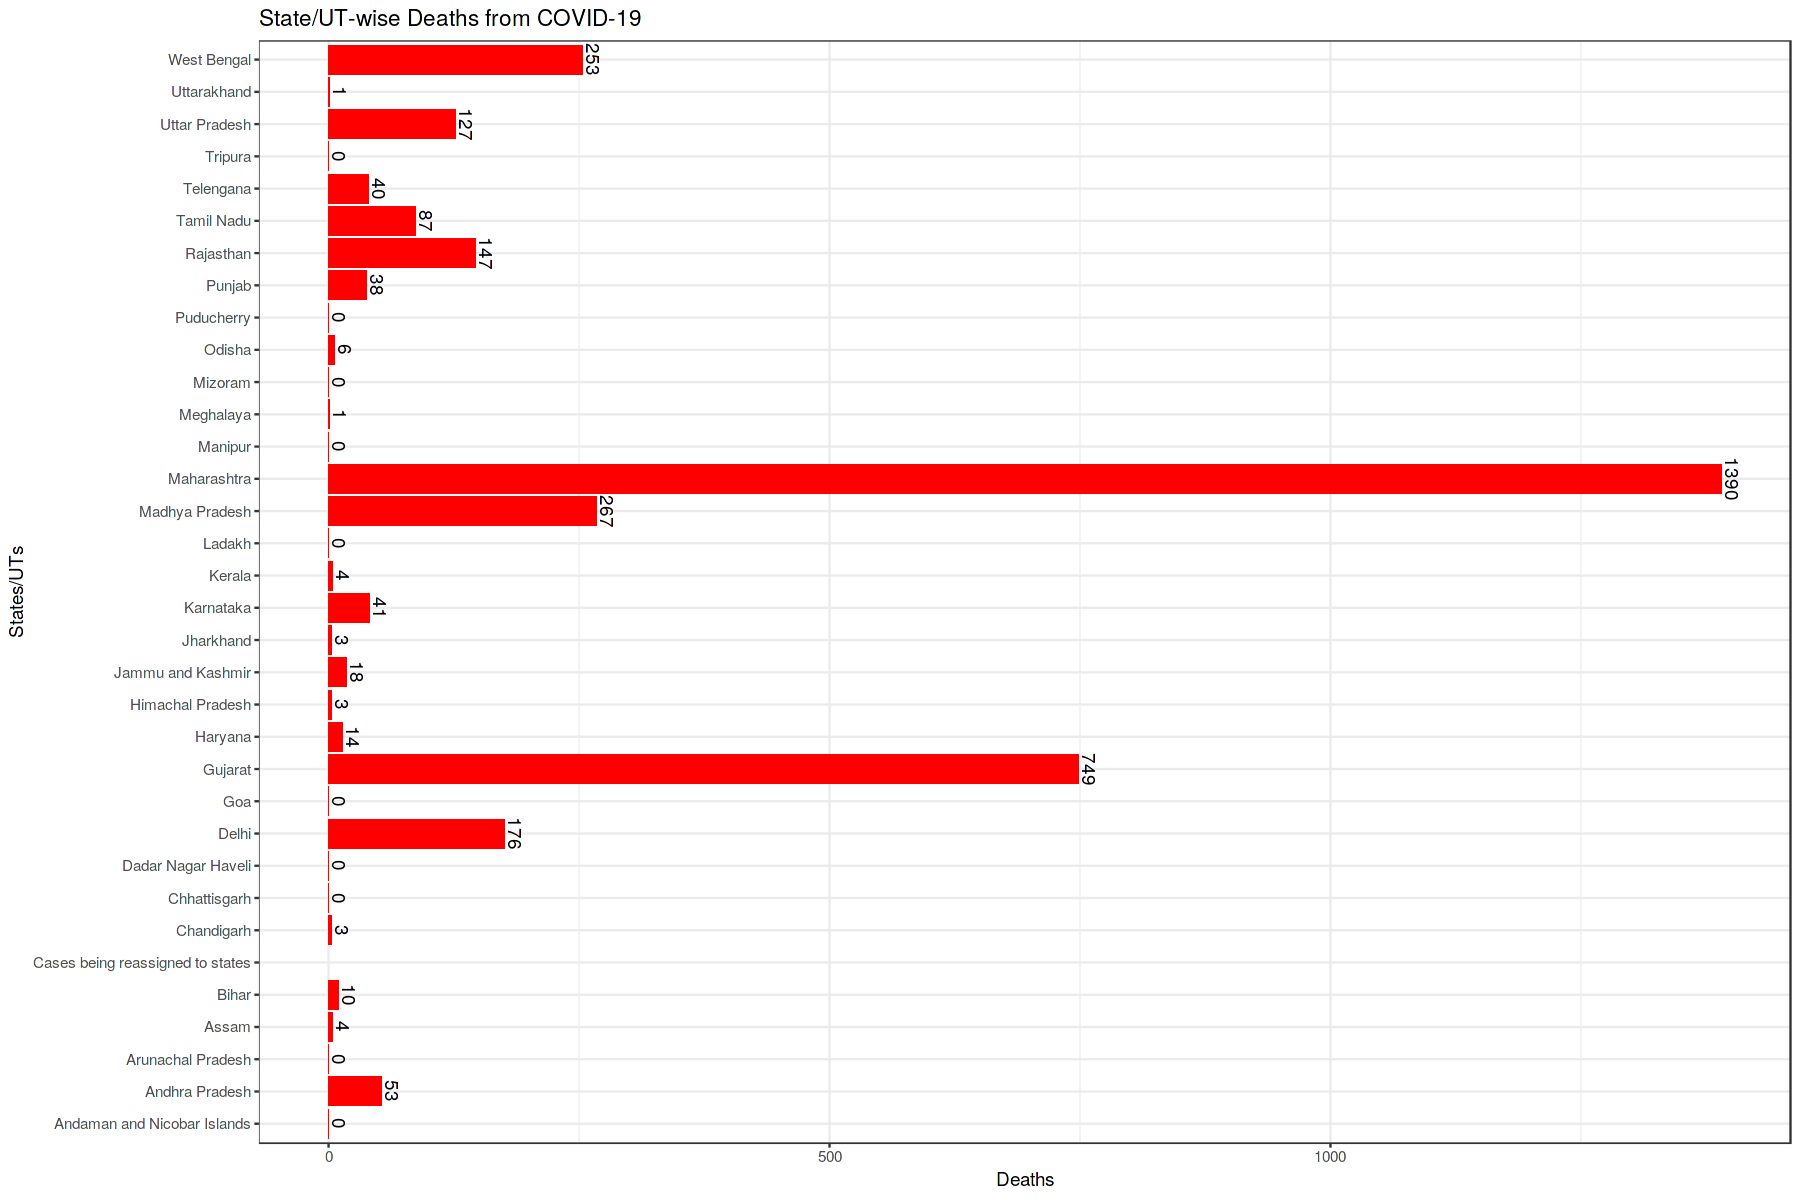

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

info_cov_india1<-filter(info_cov_india,Date==max(Date))


ggplot(info_cov_india1, aes(x=State.UnionTerritory, y=Confirmed))+geom_col(fill="orange")+ theme(axis.text.x=element_text(size=20, angle=90, hjust = 1, vjust = 0.5 ) , plot.background = element_rect( colour = NULL,  size = 20,  linetype = NULL,  color = NULL, fill = NULL, inherit.blank = FALSE)) +xlab("States/UTs")+ylab("Total Cases")+ labs(title="State/UT-wise Cases of COVID-19")+ theme_bw() + geom_text(aes(label=round(Confirmed) ), position=position_dodge(width=1.0),vjust=-0.25,angle=270)+coord_flip()
ggplot(info_cov_india1, aes(x=State.UnionTerritory, y=Cured))+geom_col(fill="#00AFBB")+ theme(axis.text.x=element_text(size=10, angle=90, hjust = 1, vjust = 0.5 ) , plot.background = element_rect( colour = NULL,  size = 20,  linetype = NULL,  color = NULL, fill = NULL, inherit.blank = FALSE)) +xlab("States/UTs")+ylab("Recovered")+ labs(title="State/UT-wise Recovered from COVID-19")+ theme_bw()+  geom_text(aes(label=round(Cured) ), position=position_dodge(width=1.0),vjust=-0.25,angle=270)+coord_flip()
ggplot(info_cov_india1, aes(x=State.UnionTerritory, y=Deaths))+geom_col(fill="red")+ theme(axis.text.x=element_text(size=10, angle=90, hjust = 1, vjust = 0.5 ) , plot.background = element_rect( colour = NULL,  size = 20,  linetype = NULL,  color = NULL, fill = NULL, inherit.blank = FALSE)) +xlab("States/UTs")+ylab("Deaths")+ labs(title="State/UT-wise Deaths from COVID-19")+ theme_bw()+  geom_text(aes(label=round(Deaths) ), position=position_dodge(width=1.0),vjust=-0.25,angle=270)+coord_flip()

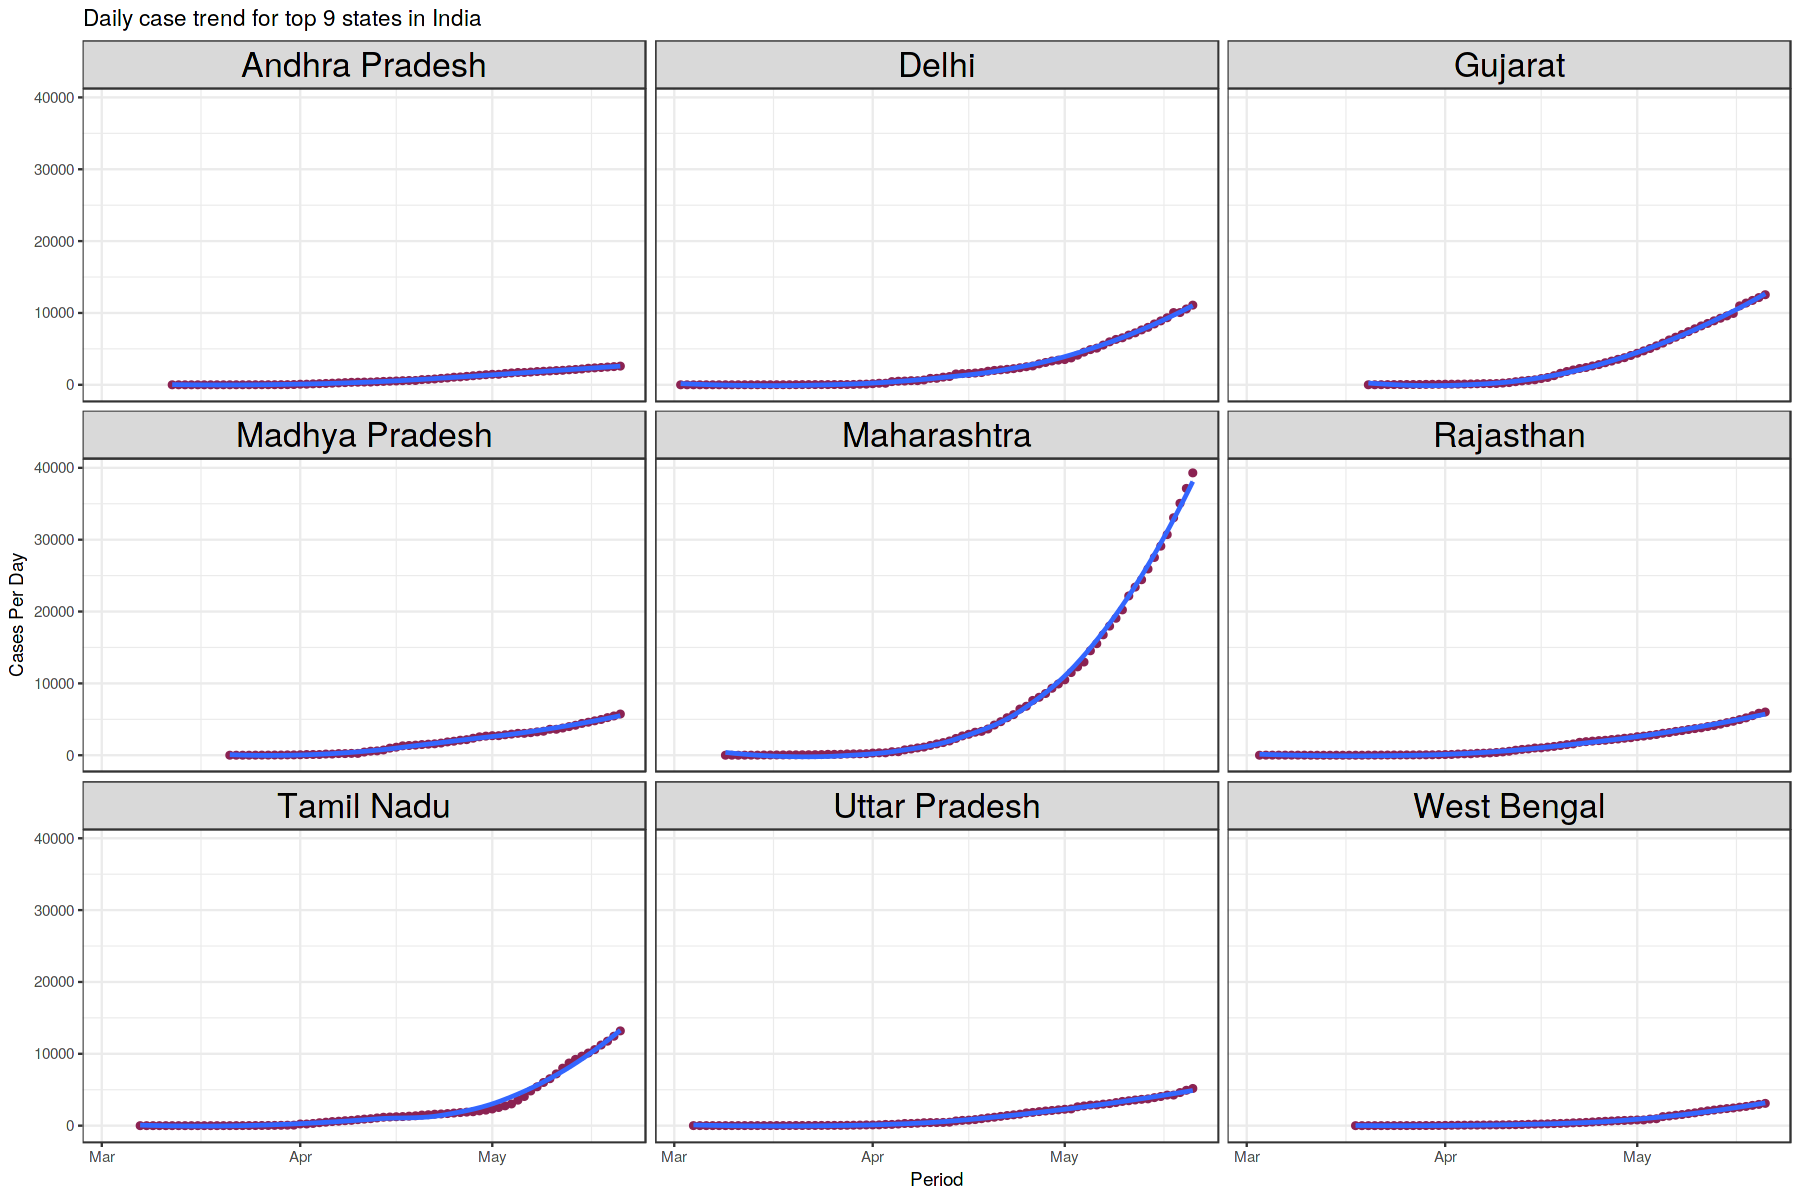

In [5]:
info_cov_india1<-filter(info_cov_india,Date==max(Date))%>%top_n(9,Confirmed)
info_cov_india1<-inner_join(info_cov_india,info_cov_india1,"State.UnionTerritory")
info_cov_india1<-arrange(info_cov_india1,Date.x)%>%group_by(State.UnionTerritory)%>%mutate(per_day_cases = c(0,diff(Confirmed.x)))

ggplot(info_cov_india1,aes(x=Date.x,y=Confirmed.x))+geom_point(color="violetred4")+geom_smooth(method="loess",formula=y~x)+theme_bw()+xlab("Period")+ylab("Cases Per Day")+labs(title="Daily case trend for top 9 states in India")+facet_wrap(~State.UnionTerritory)+theme(strip.text.x = element_text(size = 20, colour = "black"))

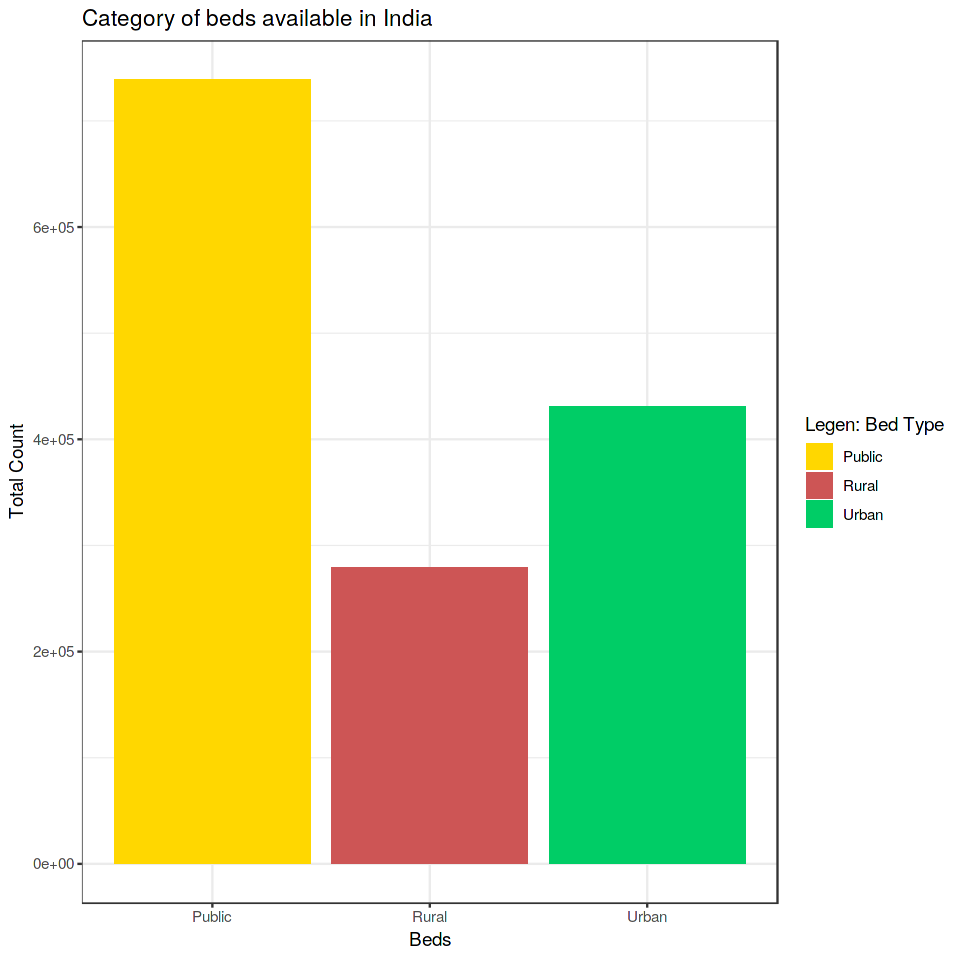

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
info_beds_india<-read.csv("../input/covid19-in-india/HospitalBedsIndia.csv",stringsAsFactors = F)

info_beds_india1<-filter(info_beds_india,State.UT=="All India")

ggplot(filter(info_beds_india,State.UT=="All India") )+geom_col(aes(x="Public",y=NumPublicBeds_HMIS,fill="Public")) + geom_col(aes(x="Rural",y=NumRuralBeds_NHP18,fill="Rural"))+ geom_col(aes(x="Urban",y=NumUrbanBeds_NHP18,fill="Urban"))+theme_bw() +ylab("Total Count")+xlab("Beds")+ labs(title="Category of beds available in India",fill = "Legen: Bed Type")+scale_fill_manual(values = c("gold","indianred3","springgreen3"))

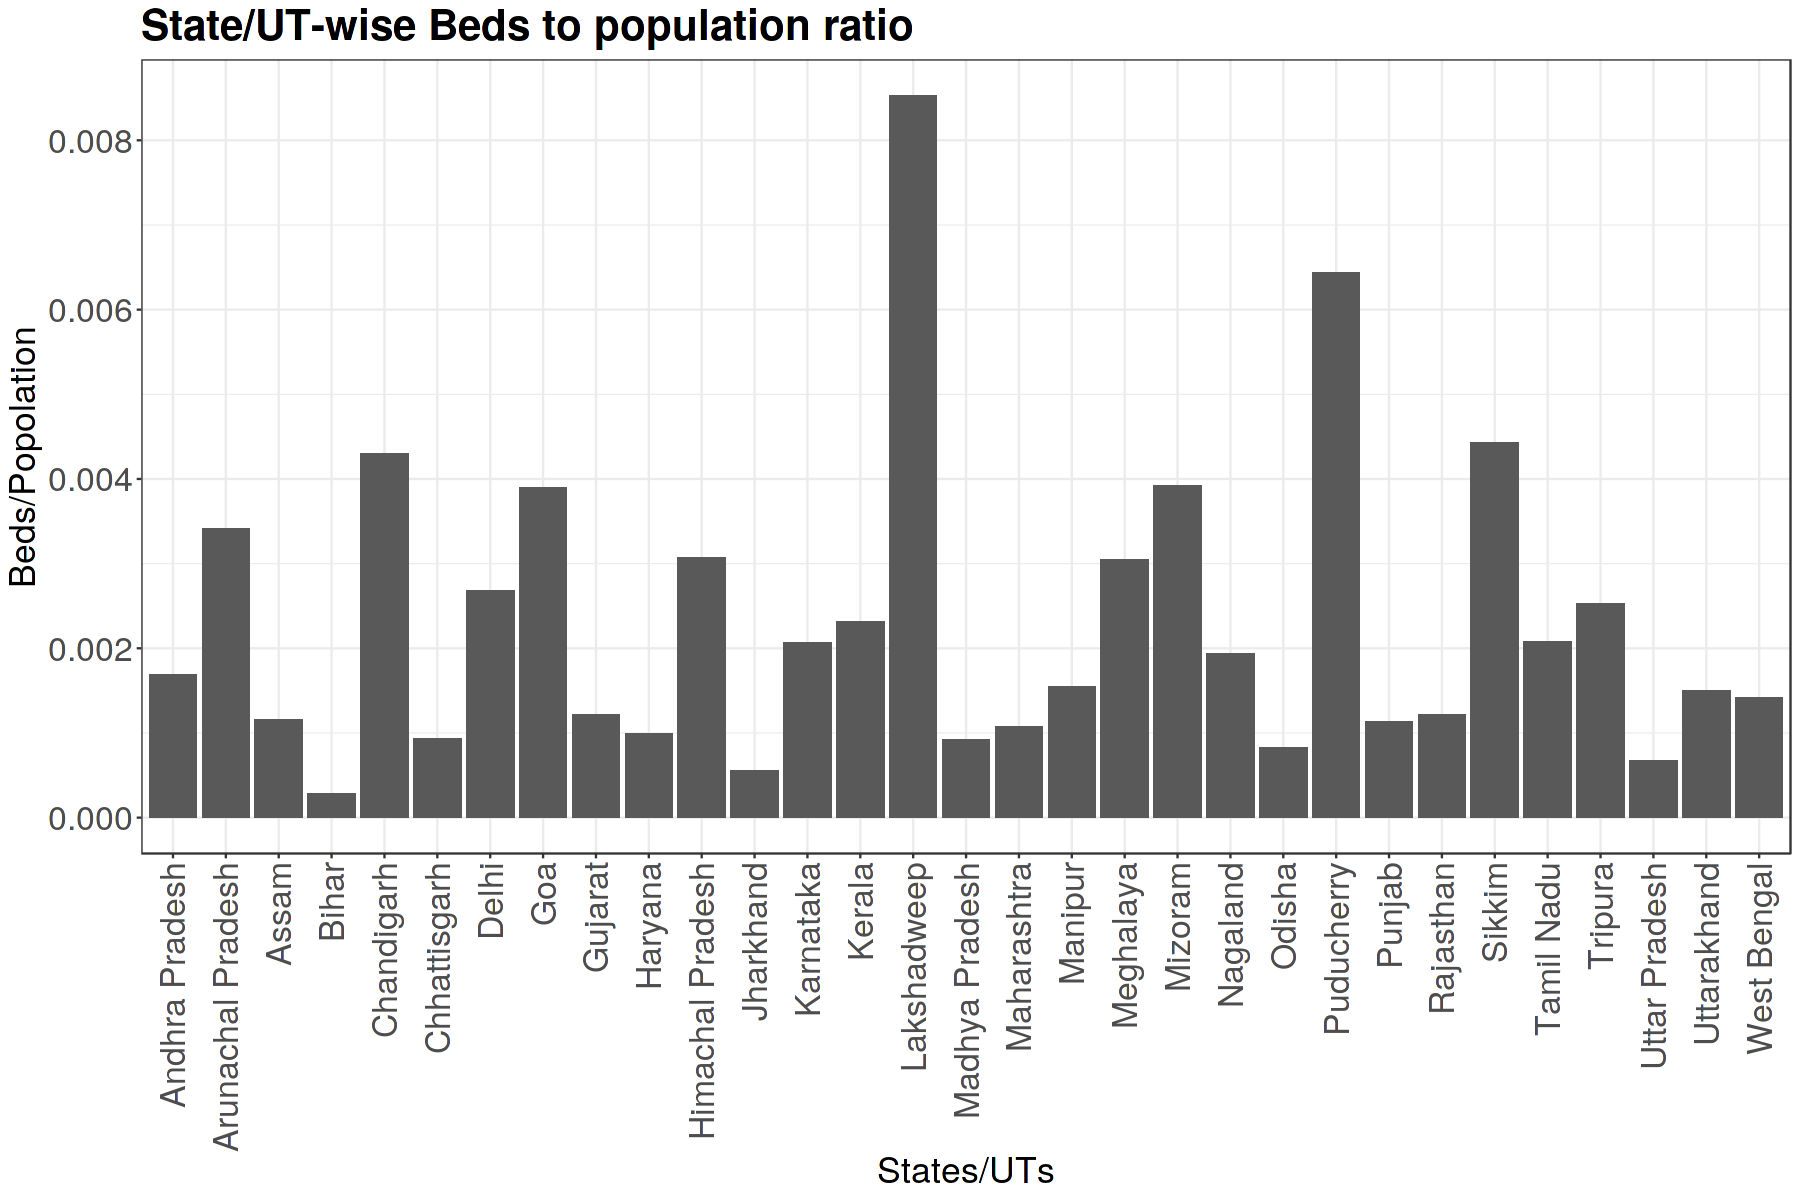

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)
info_pop_india<-read.csv("../input/covid19-in-india/population_india_census2011.csv",stringsAsFactors = F)

info_pop_india1<-inner_join(info_pop_india,info_beds_india,by=c("State...Union.Territory"="State.UT"))
info_pop_india1[,"beds_to_pop_ratio"]<-((info_pop_india1$NumPublicBeds_HMIS+info_pop_india1$NumRuralBeds_NHP18+info_pop_india1$NumUrbanBeds_NHP18)/info_pop_india1$Population)

ggplot(info_pop_india1, aes(x=State...Union.Territory, y=beds_to_pop_ratio))+geom_col()+xlab("States/UTs")+theme_bw()+ theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20, angle=90, hjust = 1, vjust = 0.5 ),axis.title=element_text(size=21),plot.title = element_text(face = "bold",size=25))+ylab("Beds/Popolation")+ labs(title="State/UT-wise Beds to population ratio")


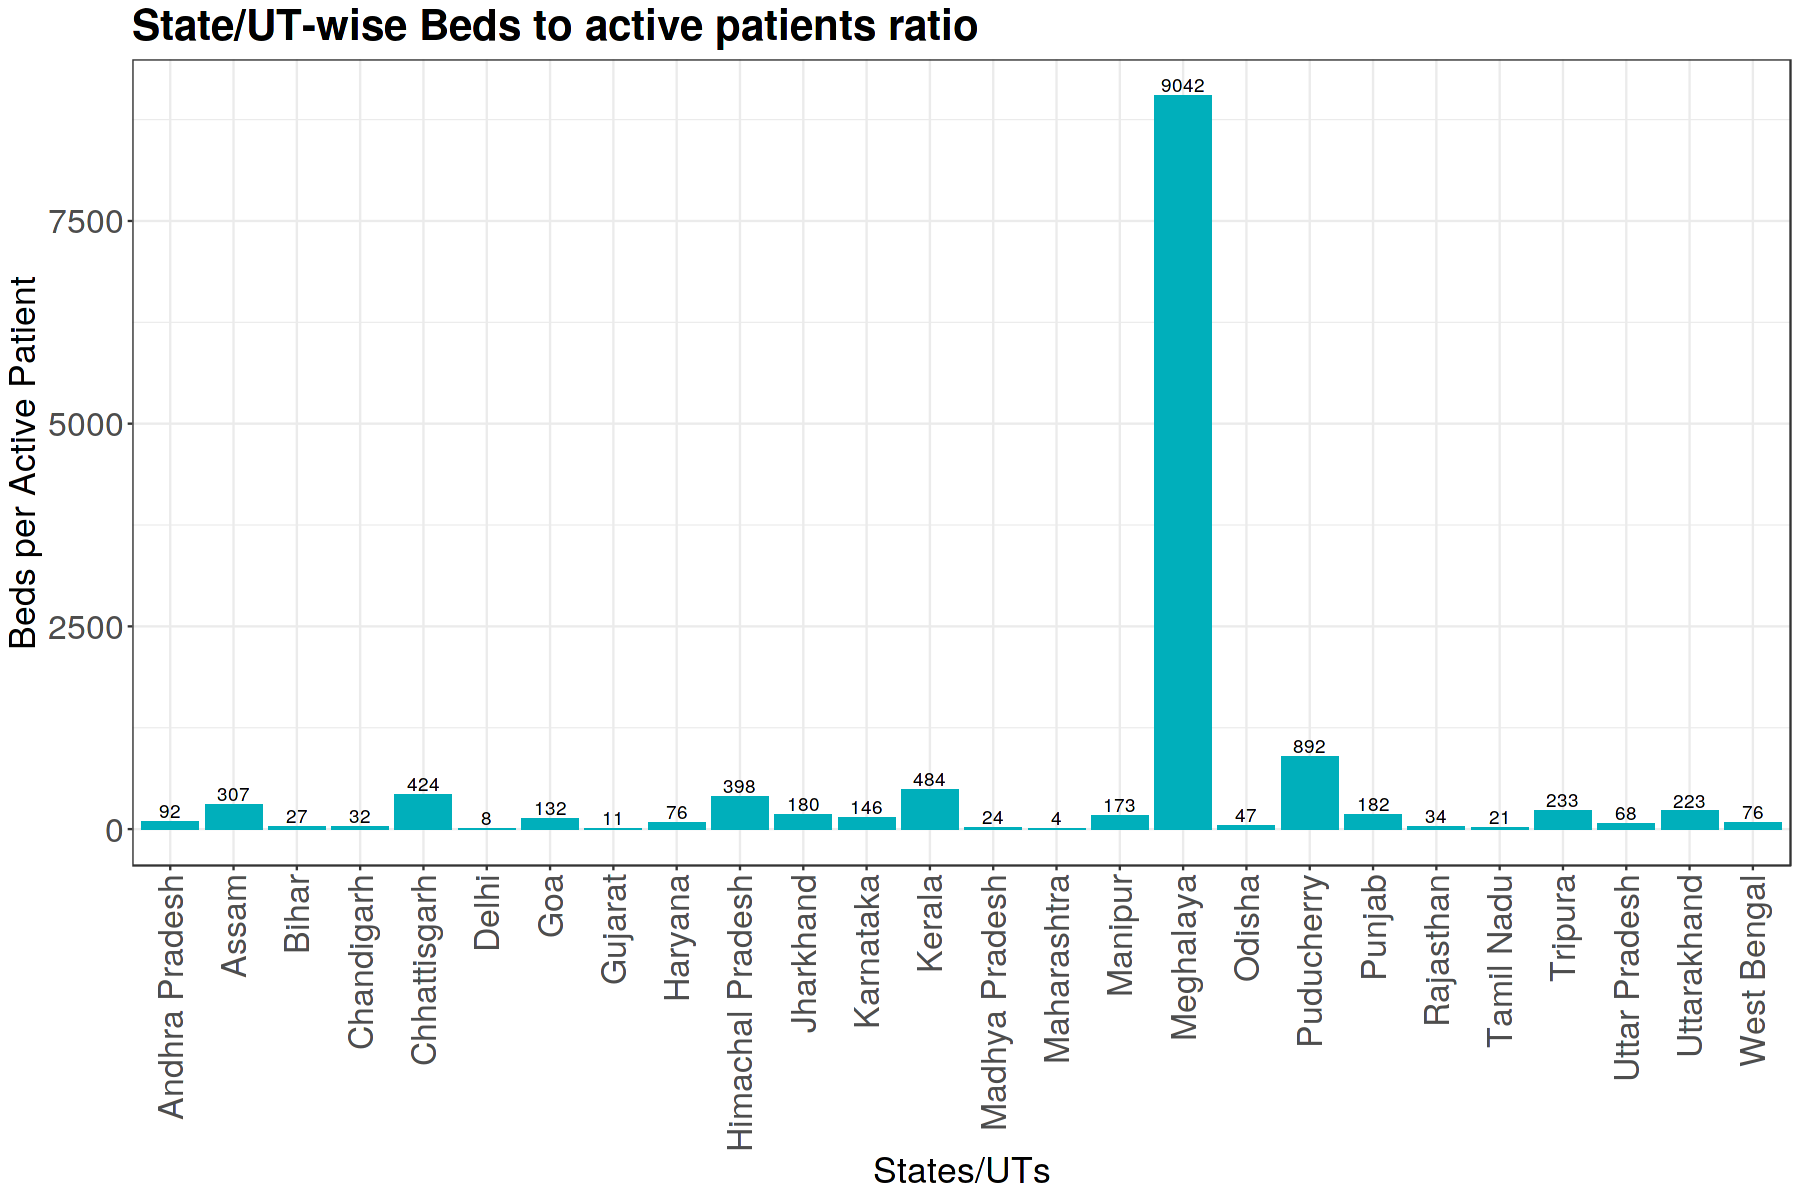

In [8]:

info_cov_india1<-filter(info_cov_india,Date==max(Date))
info_cov_india1[,"Active"]<-info_cov_india1$Confirmed-(info_cov_india1$Deaths+info_cov_india1$Cured)
info_cov_india1<-filter(info_cov_india1,Active>0)
info_cov_india1<-inner_join(info_cov_india1,info_beds_india,by=c("State.UnionTerritory"="State.UT"))

info_cov_india1[,"beds_to_act_case_ratio"]<-((info_cov_india1$NumPublicBeds_HMIS+info_cov_india1$NumRuralBeds_NHP18+info_cov_india1$NumUrbanBeds_NHP18)/info_cov_india1$Active)

ggplot(info_cov_india1, aes(x=State.UnionTerritory, y=beds_to_act_case_ratio))+geom_col(fill="#00AFBB")+ theme_bw()+theme(,axis.title=element_text(size=21),plot.title = element_text(face = "bold",size=25),axis.text.y=element_text(size=20),axis.text.x=element_text(size=20, angle=90, hjust = 1, vjust = 0.5 ) , plot.background = element_rect( colour = NULL,  size = 20,  linetype = NULL,  color = NULL, fill = NULL, inherit.blank = FALSE)) +xlab("States/UTs")+ylab("Beds per Active Patient")+ labs(title="State/UT-wise Beds to active patients ratio")+  geom_text(aes(label=round(beds_to_act_case_ratio) ), position=position_dodge(width=1.0), vjust=-0.25)

***If Above count goes on reducing for any state it will be dangerous situation, as patients slowly outnumbering the beds***

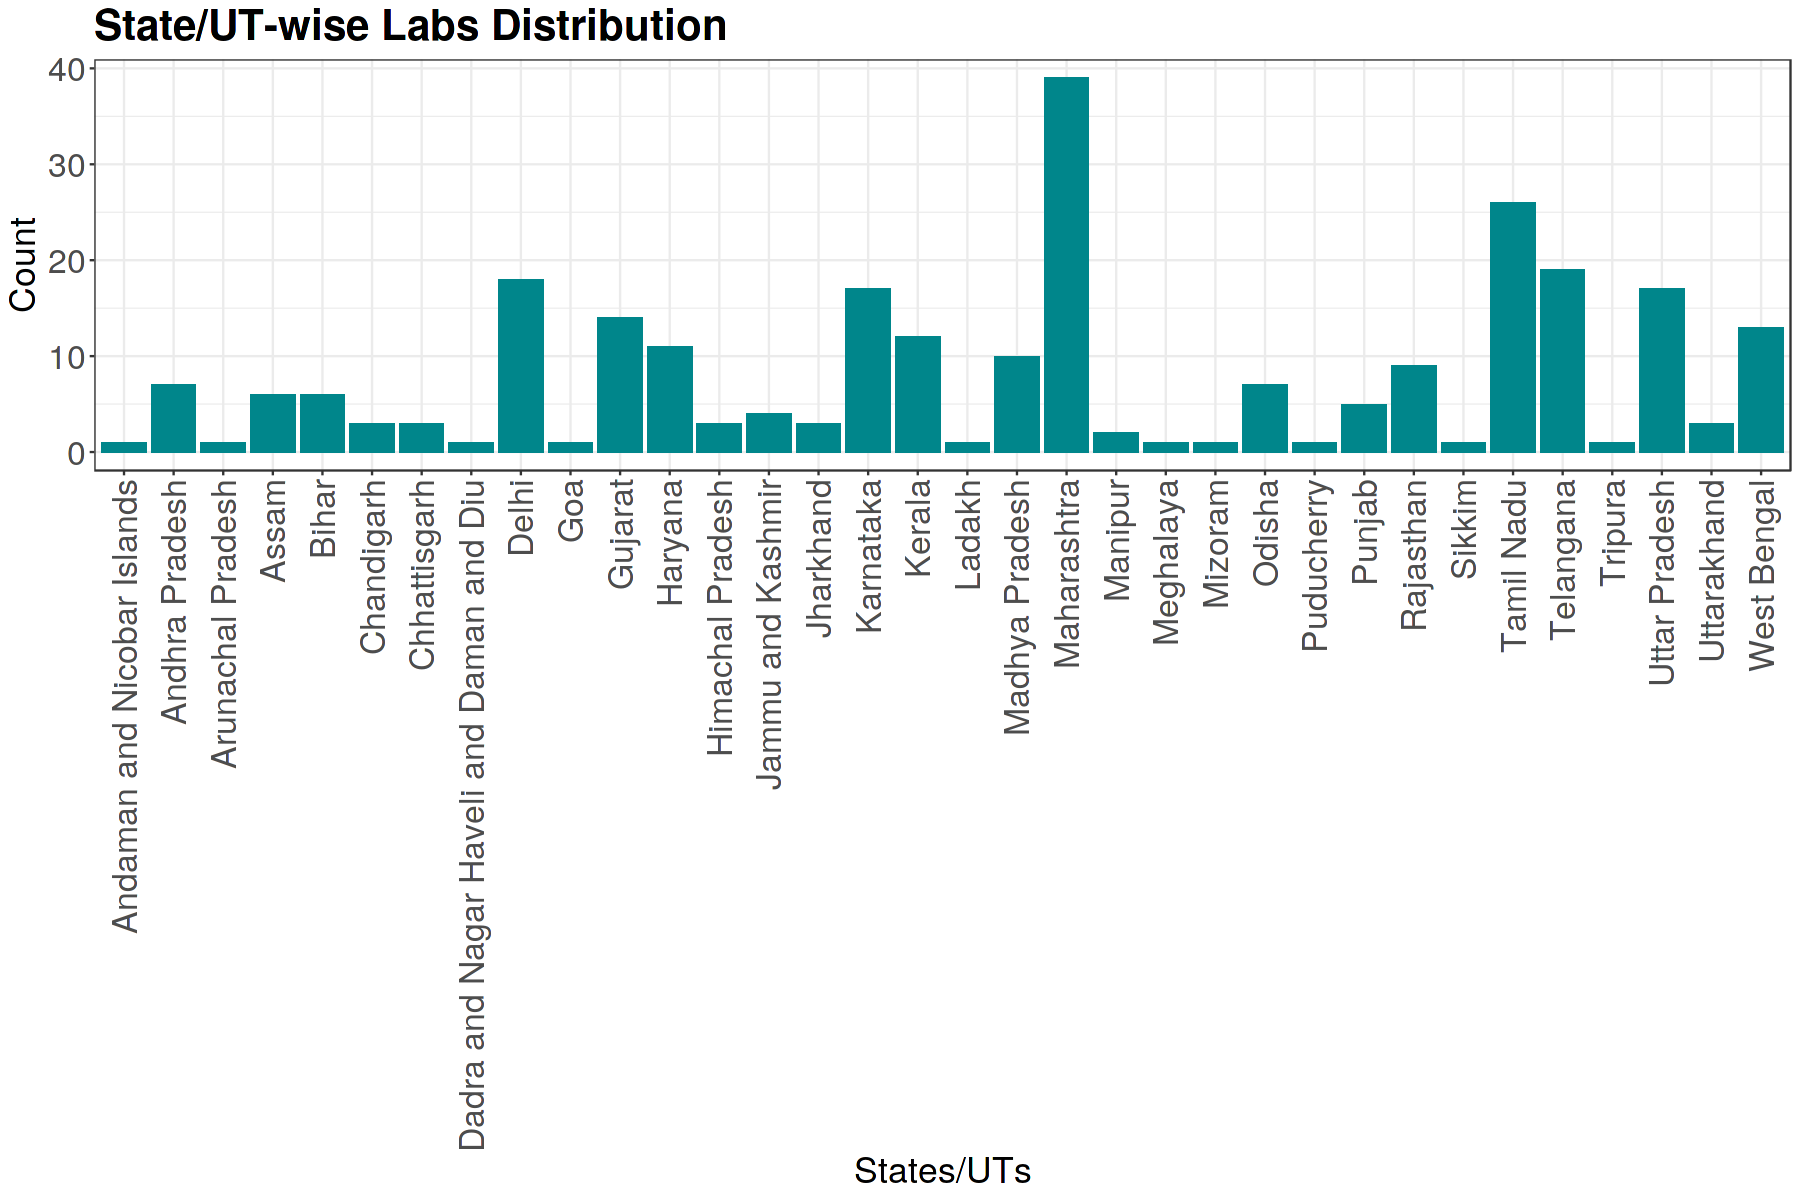

In [9]:
info_lab_india<-read.csv("../input/covid19-in-india/ICMRTestingLabs.csv",stringsAsFactors = F)

info_lab_india1<-info_lab_india%>%group_by(state,type)%>%tally()

ggplot(info_lab_india1, aes(x=state, y=n) )+geom_col(fill="turquoise4")+theme_bw()+ theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20, angle=90, hjust = 1, vjust = 0.5 ),axis.title=element_text(size=21),plot.title = element_text(face = "bold",size=25))+xlab("States/UTs")+ylab("Count")+ labs(title="State/UT-wise Labs Distribution")

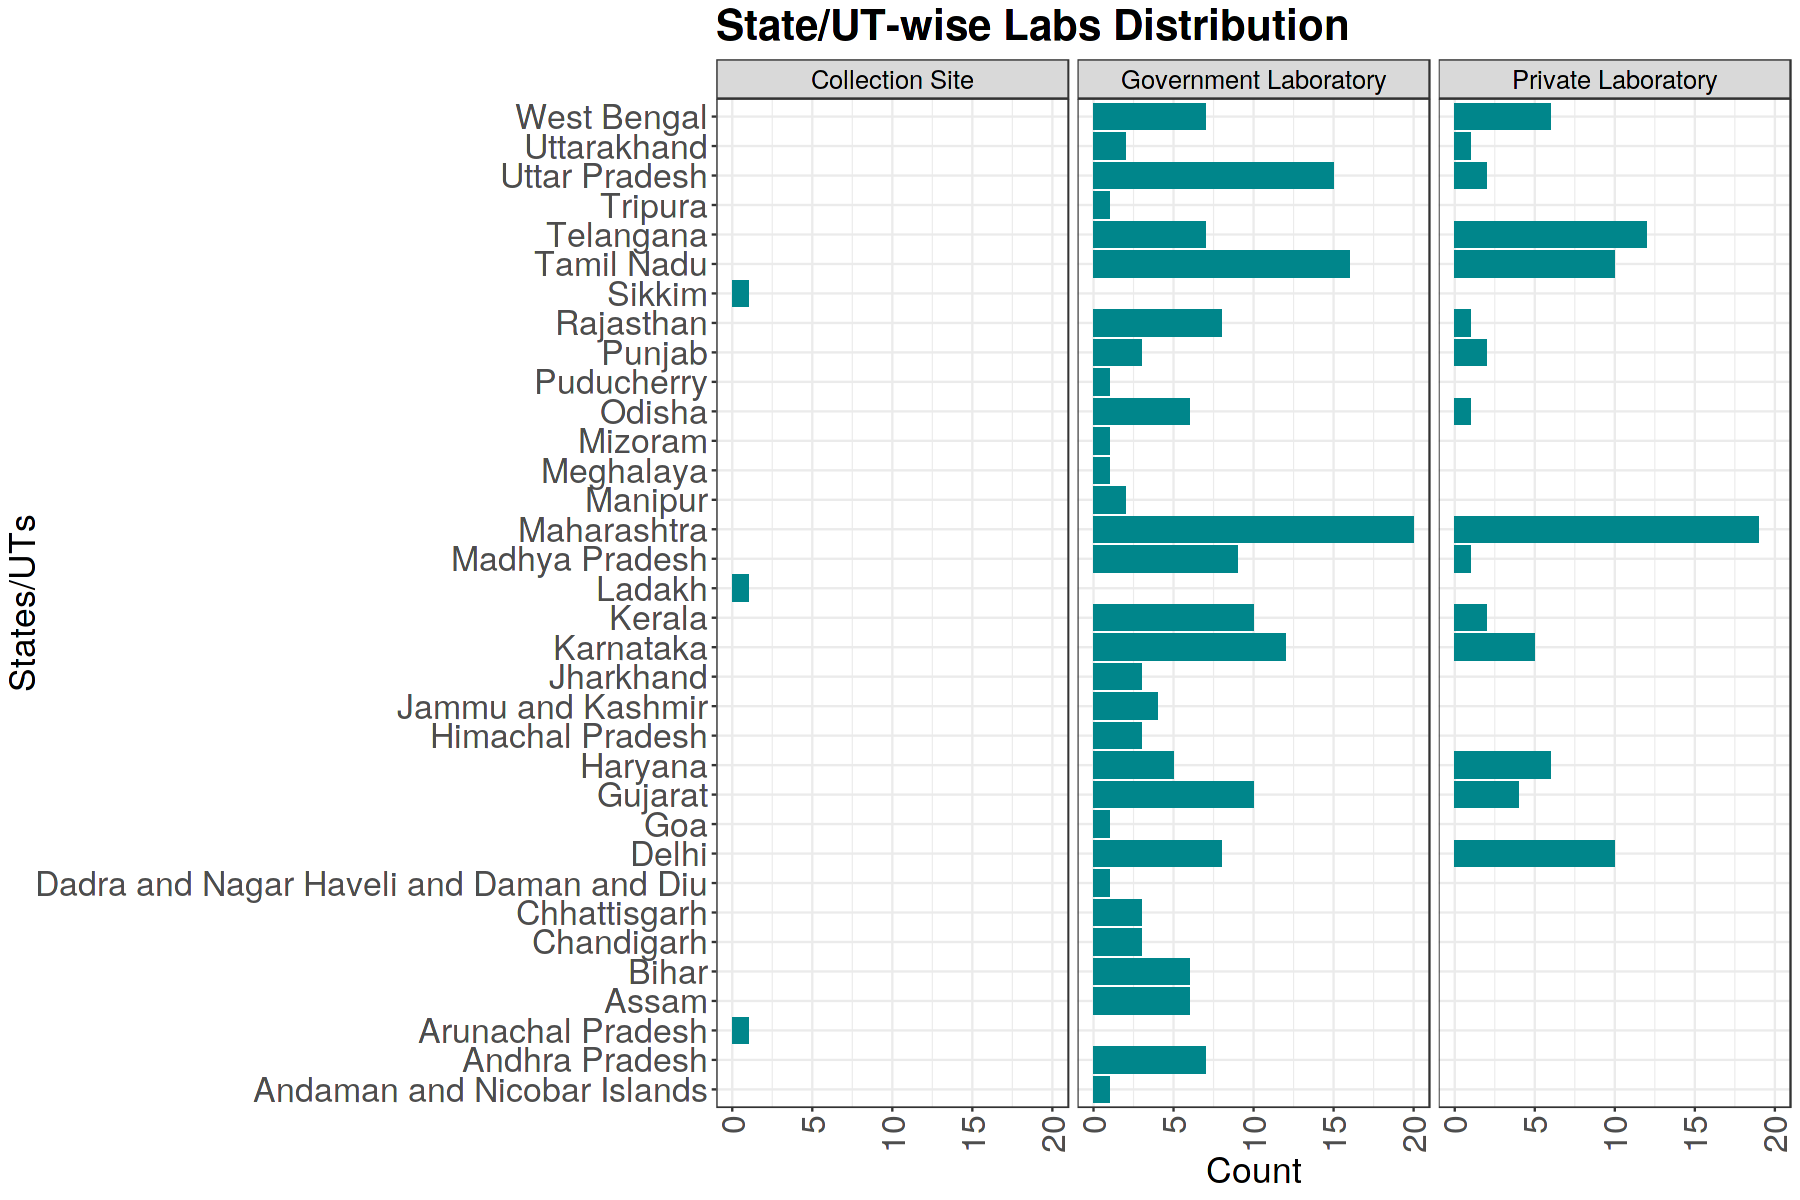

In [10]:
ggplot(info_lab_india1, aes(x=state, y=n) )+geom_col(fill="turquoise4")+theme_bw()+ theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20, angle=90, hjust = 1, vjust = 0.5 ),axis.title=element_text(size=21),plot.title = element_text(face = "bold",size=25),strip.text.x = element_text(size = 15, colour = "black"))+xlab("States/UTs")+ylab("Count")+ labs(title="State/UT-wise Labs Distribution")+facet_grid(~type)+
  coord_flip()

***Below the negative line is almost superimposable with number of tests conducted, which tells even though India conducts too many tests, its not finding too many affected people.***

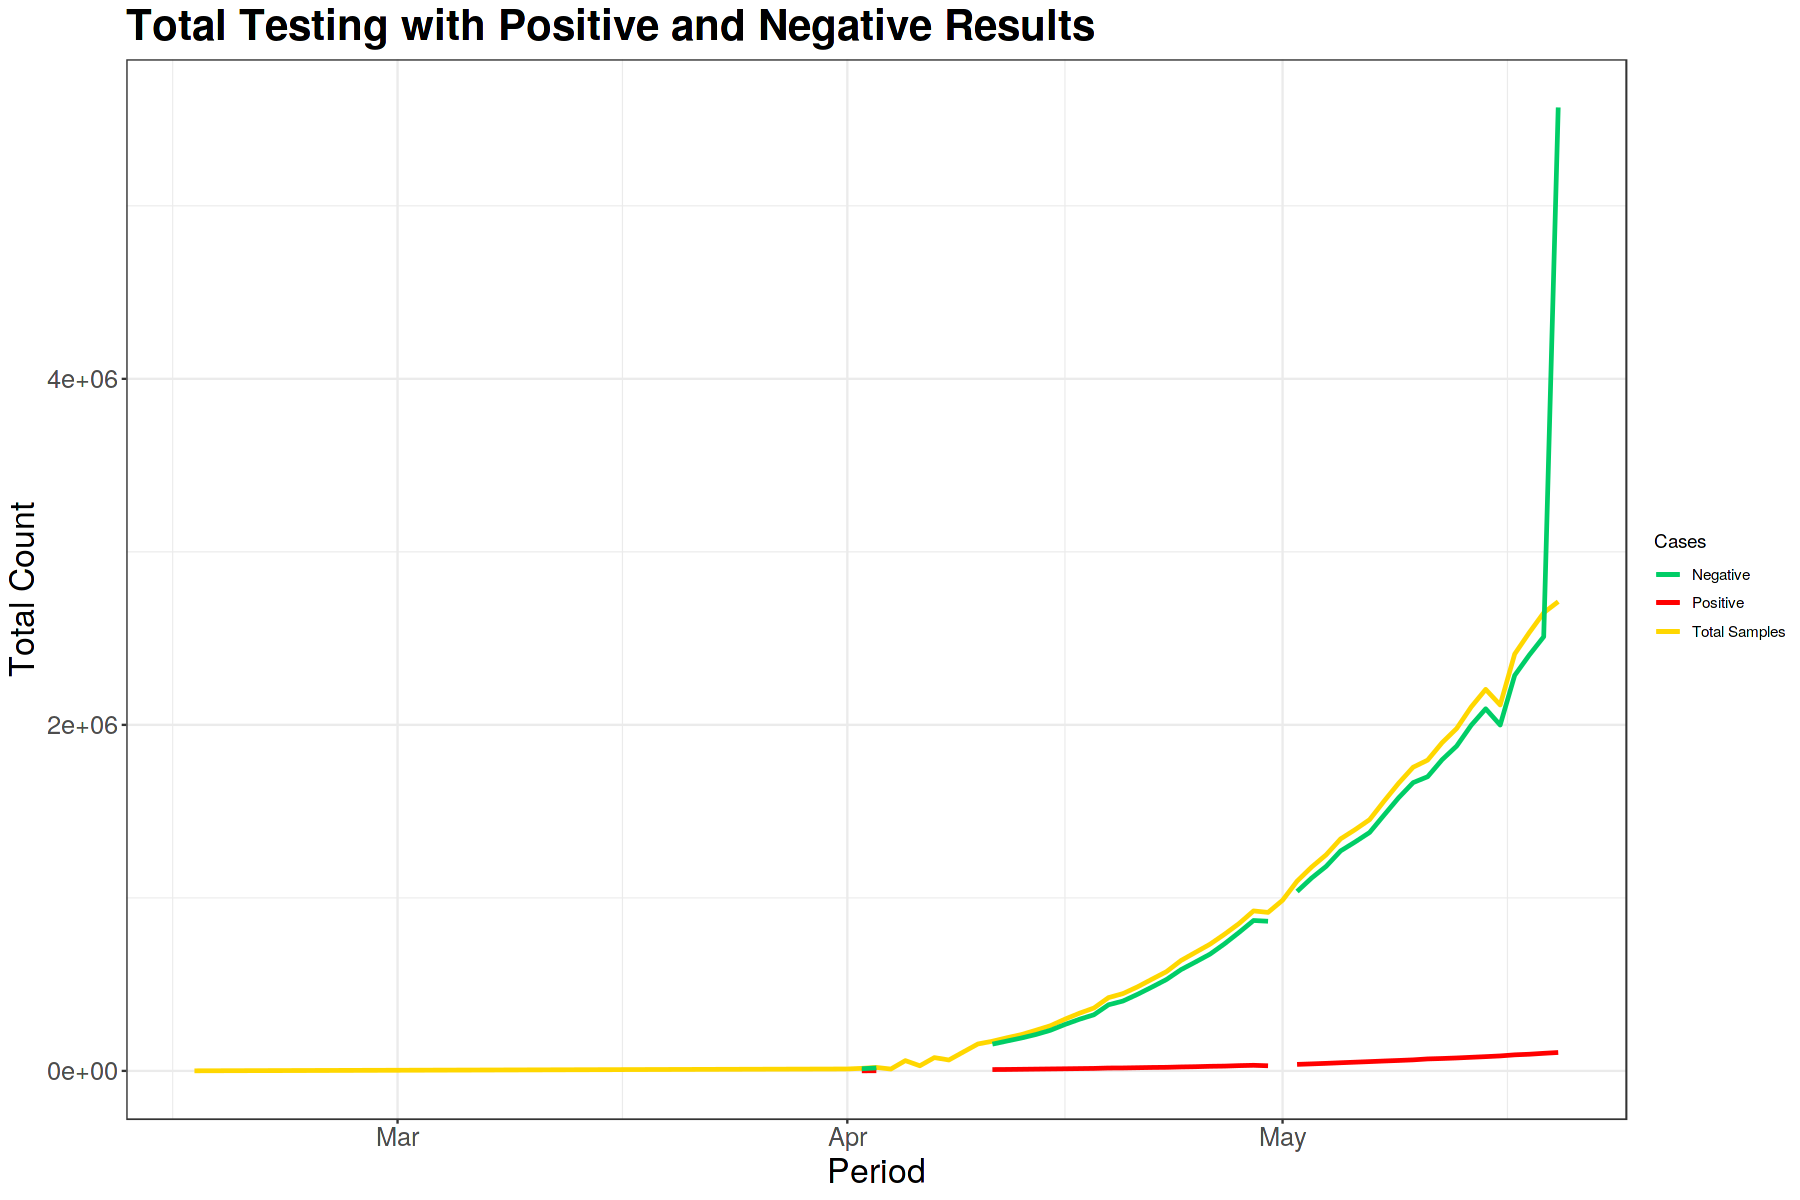

In [11]:
info_test_details_india<-read.csv("../input/covid19-in-india/StatewiseTestingDetails.csv",stringsAsFactors = F)
info_test_details_india[,"NegClean"]<-ifelse(is.na(info_test_details_india$Negative),(info_test_details_india$TotalSamples-info_test_details_india$Positive),info_test_details_india$Negative)

info_test_details_india$Date<-as.Date.character(info_test_details_india$Date,format = c("%Y-%m-%d"))

info_test_details_india1<-arrange(info_test_details_india,Date)%>%group_by(Date)%>% summarize(Total=sum(TotalSamples),Negative=sum(NegClean),Positive=sum(Positive))

ggplot(info_test_details_india1,aes(x=Date))+geom_line(aes(y=Total,color="Total Samples"),size=1) + geom_line(aes(y=Positive,color="Positive"), size=1)+ geom_line(aes(y=Negative,color="Negative"), size=1)+theme_bw() +ylab("Total Count")+xlab("Period")+ labs(title="Total Testing with Positive and Negative Results",color = "Cases")+scale_color_manual(values = c("springgreen3","red","gold"))+theme(axis.title=element_text(size=20),axis.text=element_text(size=15),plot.title = element_text(face = "bold",size=25))
# 
# ggplot(info_test_details_india1,aes(x=Date))+geom_area(aes(y=Total,fill="Total Samples"),position = "stack",alpha=0.5) + geom_area(aes(y=Positive,fill="Positive"),position = "stack",alpha=0.5)+ geom_area(aes(y=Negative,fill="Negative"),position = "stack",alpha=0.5)+theme_bw() +ylab("Total Count")+xlab("Period")+ labs(title="Total Testing with Positive and Negative Results",fill = "Cases")+scale_fill_manual(values = c("springgreen3","red","gold"))

***Below is the ratio to see the pattern of daily cases to the total cases***

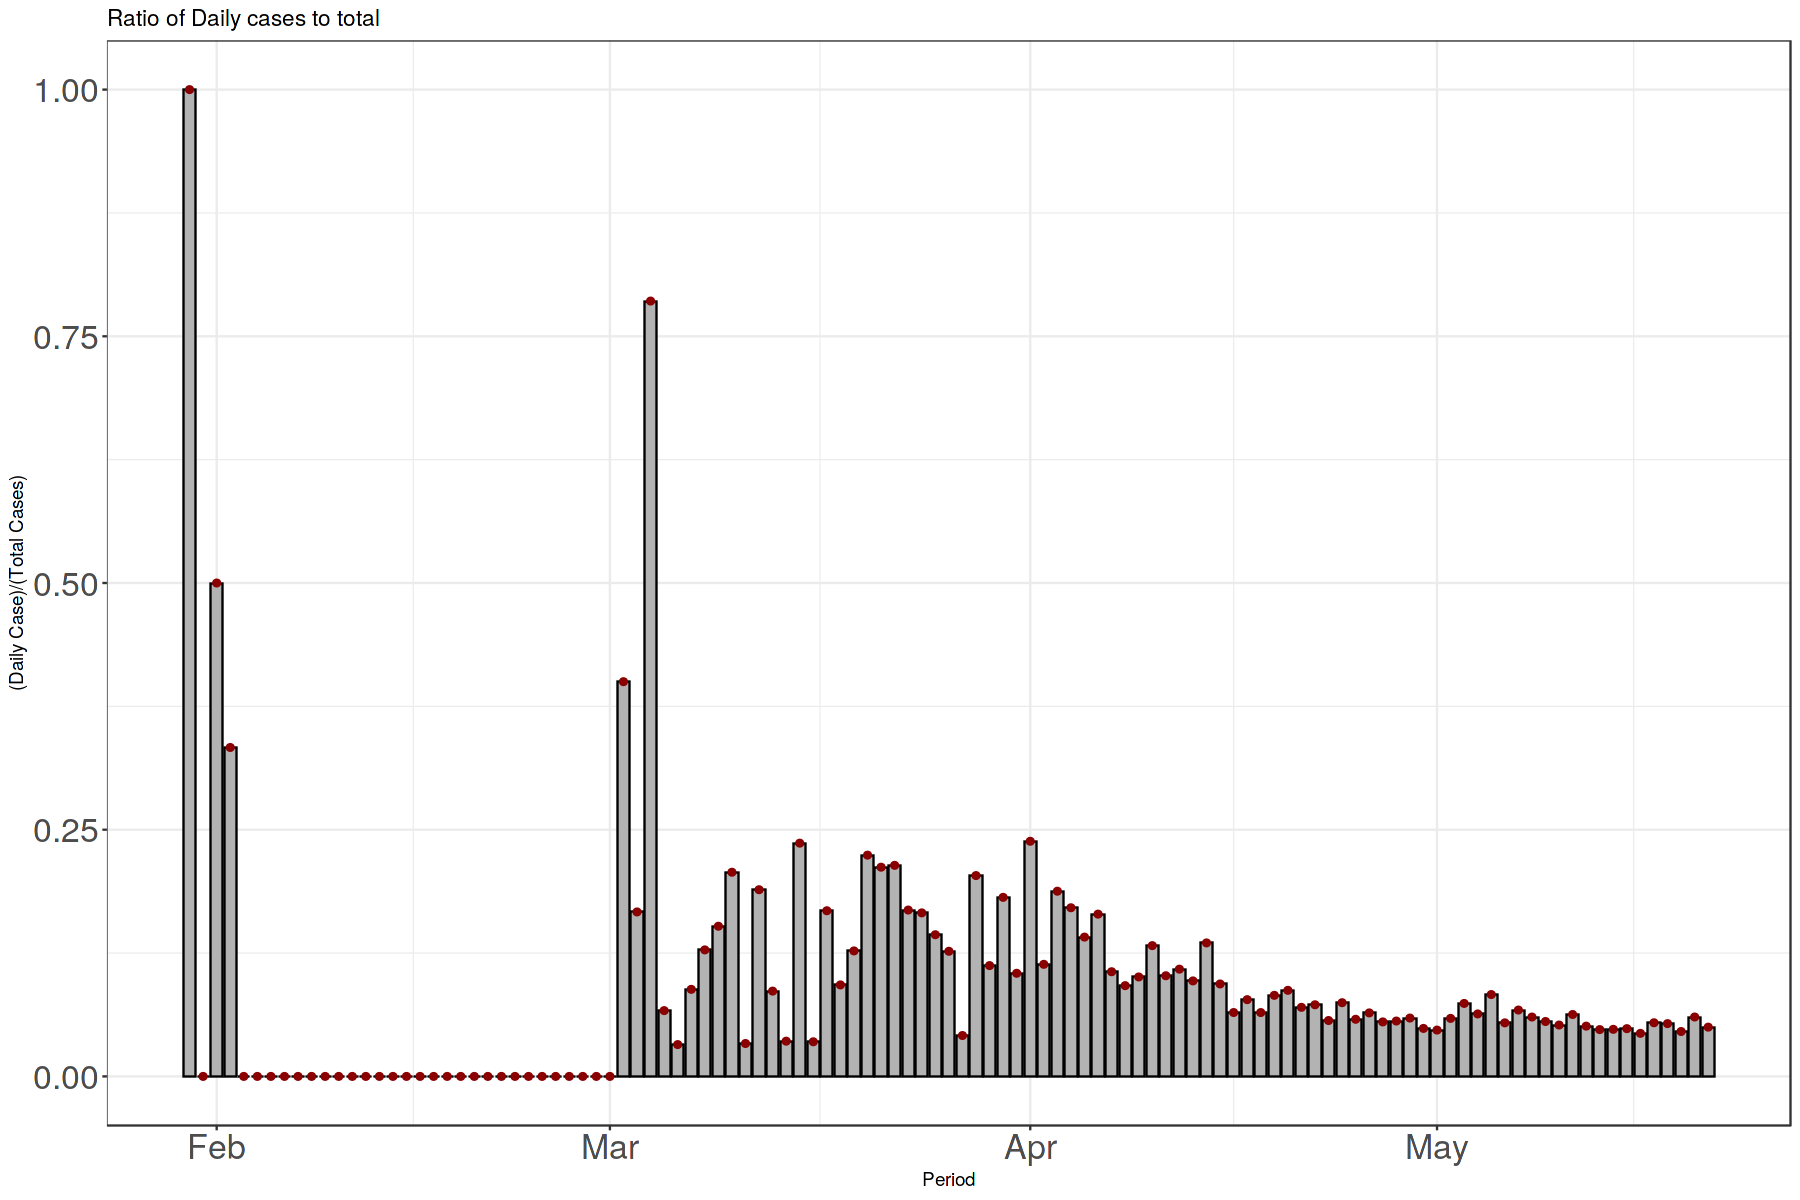

In [12]:
info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(Date)%>% summarize(cured=sum(Cured),deaths=sum(Deaths),case=sum(Confirmed))%>%mutate(per_day_cases=c(0,diff(case)),per_day_deaths=c(0,diff(deaths)),per_day_cured=c(0,diff(cured)))

info_cov_india1$per_day_cases<-ifelse(info_cov_india1$Date==min(info_cov_india1$Date),info_cov_india1$case,info_cov_india1$per_day_cases)
info_cov_india1$per_day_deaths<-ifelse(info_cov_india1$Date==min(info_cov_india1$Date),info_cov_india1$deaths,info_cov_india1$per_day_deaths)
info_cov_india1$per_day_cured<-ifelse(info_cov_india1$Date==min(info_cov_india1$Date),info_cov_india1$cured,info_cov_india1$per_day_cured)
info_cov_india1%<>%mutate(rate_case=(per_day_cases/case),rate_death = (per_day_deaths/deaths),rate_cure = (per_day_cured/cured))

ggplot(info_cov_india1,aes(x=Date))+geom_col(aes(y=rate_case),color="black",fill="gray70")+ geom_point(aes(y=rate_case),color="red4") +theme_bw()+theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20),legend.position = "none") +ylab("(Daily Case)/(Total Cases)")+xlab("Period")+ labs(title="Ratio of Daily cases to total")

***Heat maps to identify stressful days and in which state its increasing and which state people recovering in more number***

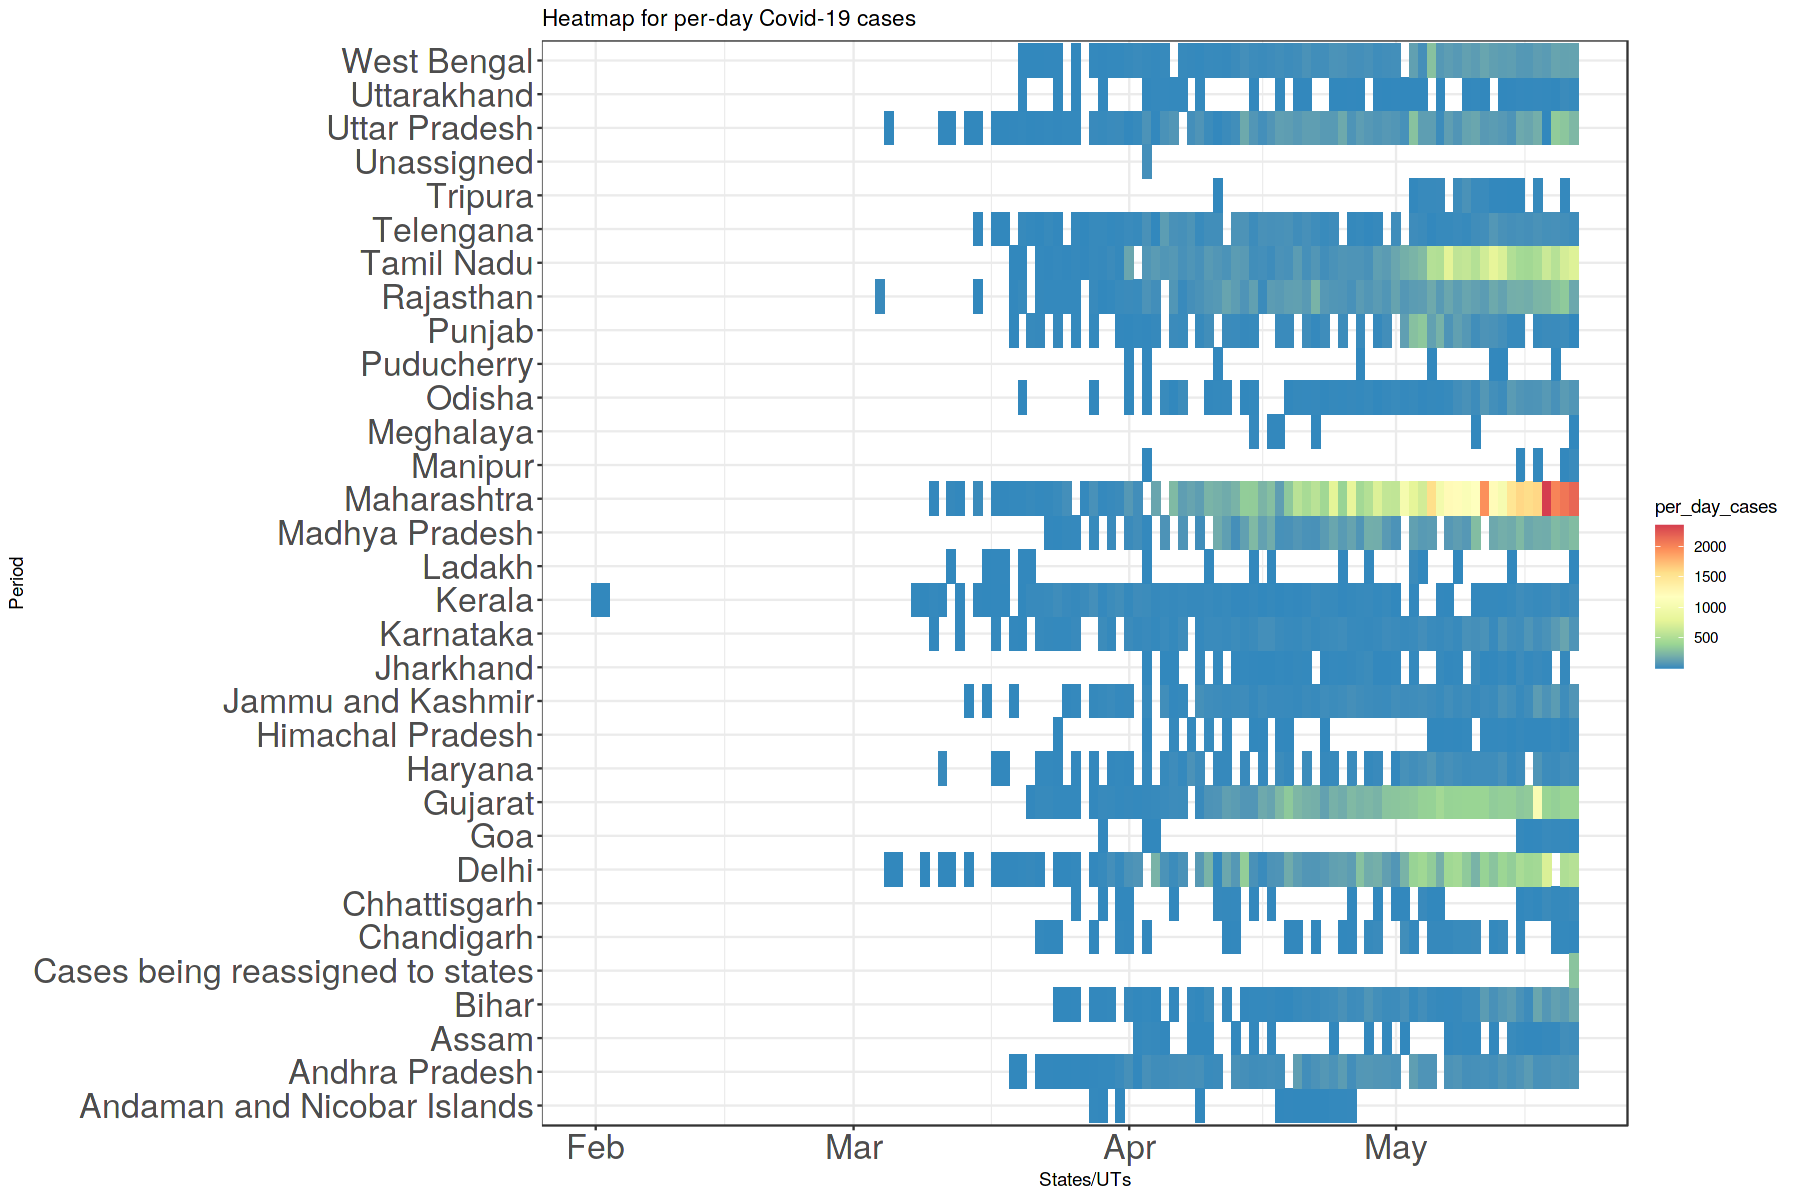

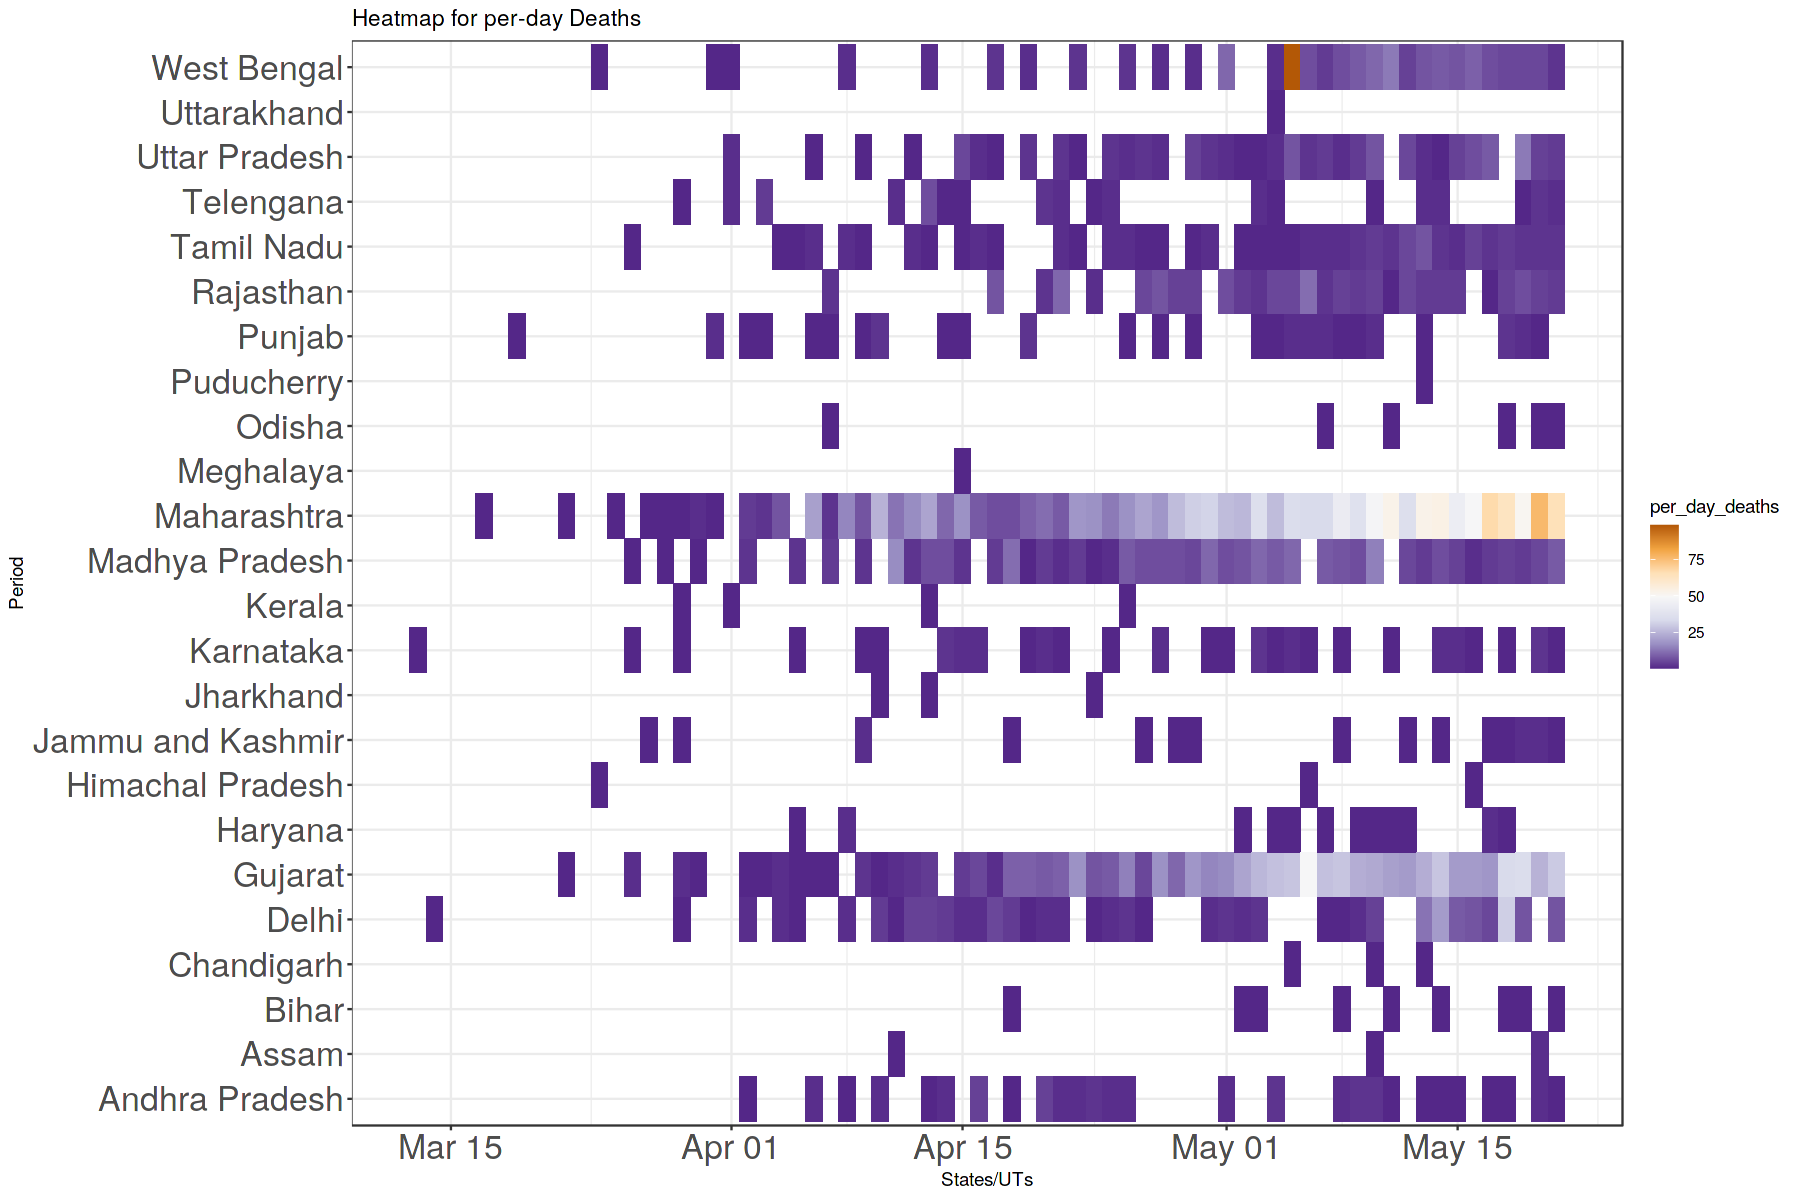

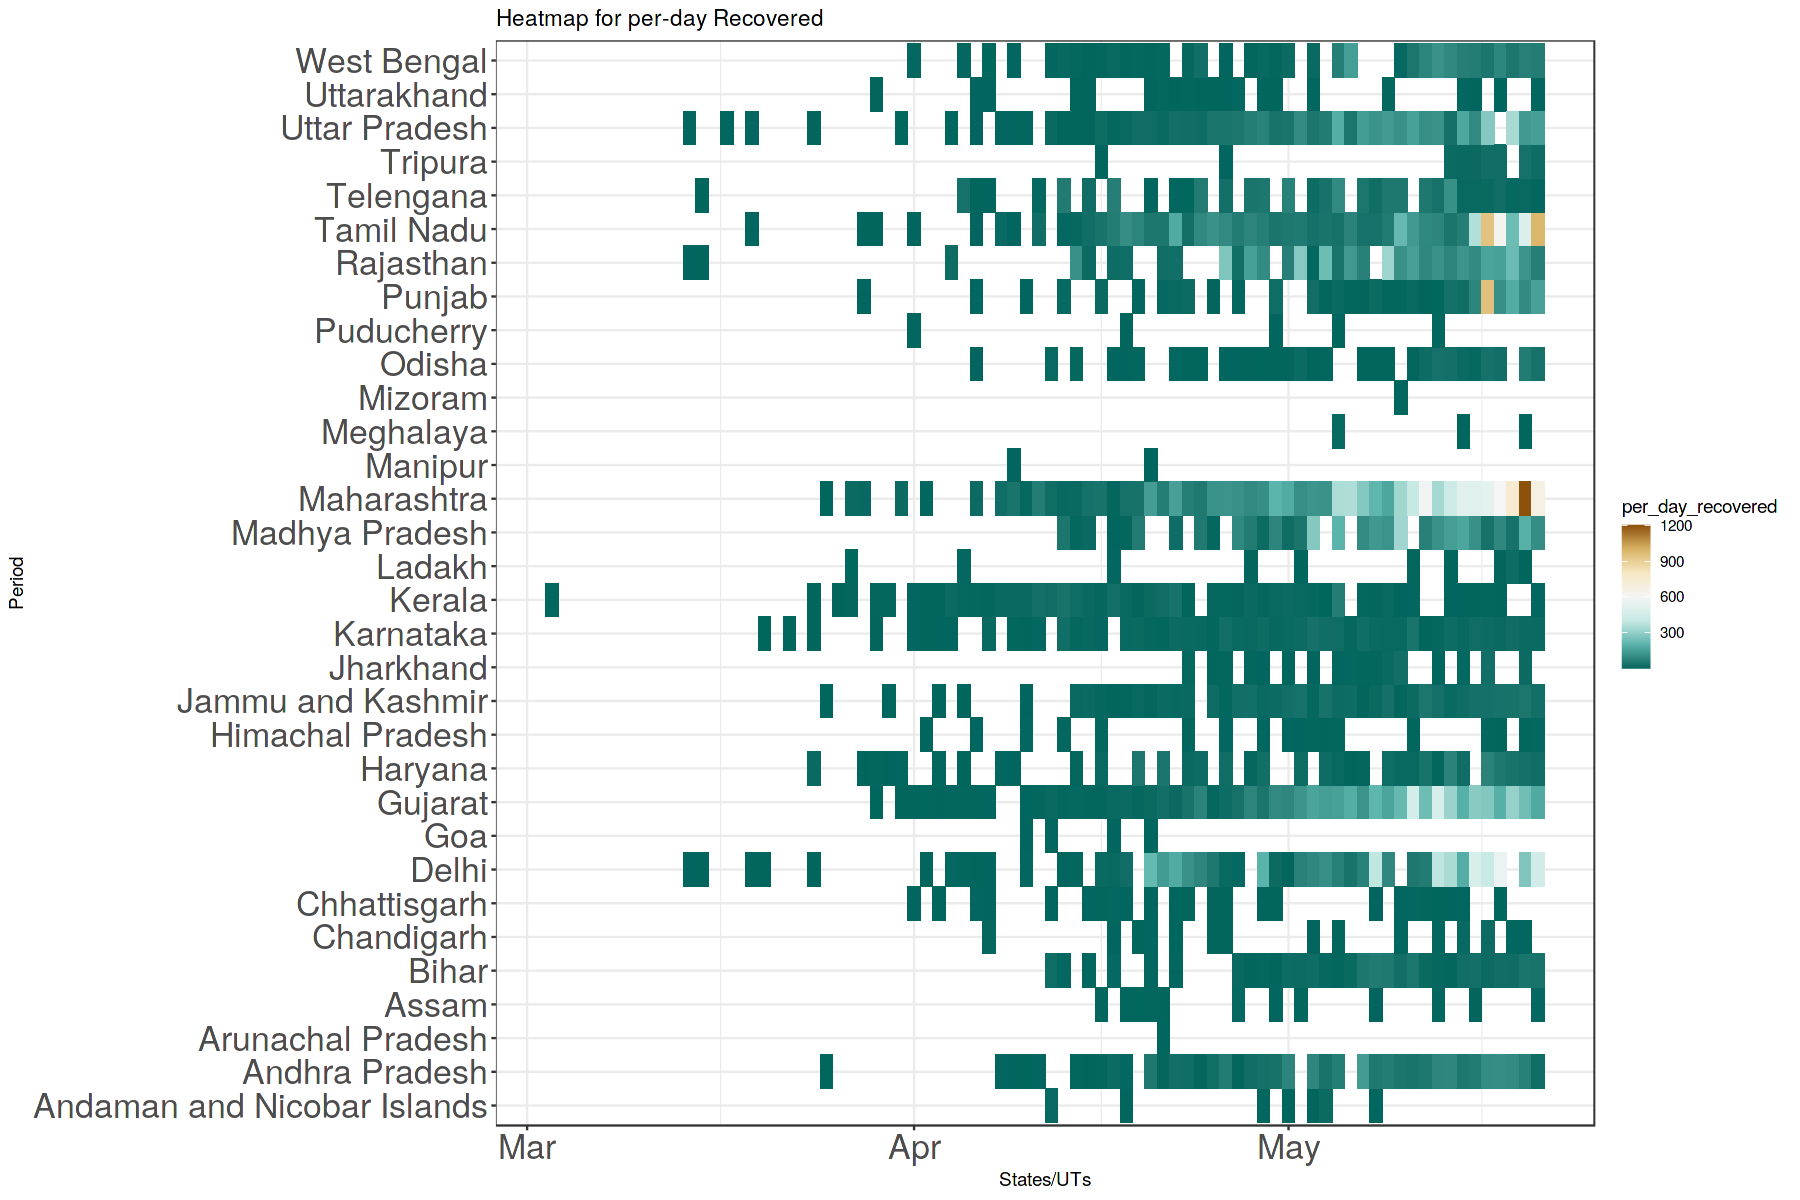

In [13]:
info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(State.UnionTerritory)%>%mutate(per_day_cases = c(0,diff(Confirmed)),per_day_deaths = c(0,diff(Deaths)),per_day_recovered = c(0,diff(Cured)))

ggplot(filter(info_cov_india1,per_day_cases>0),aes(x=Date,y=State.UnionTerritory,fill=per_day_cases))+geom_tile()+scale_fill_distiller(palette = "Spectral")+xlab("States/UTs")+ylab("Period")+ labs(title="Heatmap for per-day Covid-19 cases") + theme_bw()+theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20))

ggplot(filter(info_cov_india1,per_day_deaths>0),aes(x=Date,y=State.UnionTerritory,fill=per_day_deaths))+geom_tile()+ scale_fill_distiller(palette = "PuOr")+xlab("States/UTs")+ylab("Period")+ labs(title="Heatmap for per-day Deaths") + theme_bw()+theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20))

ggplot(filter(info_cov_india1,per_day_recovered>0),aes(x=Date,y=State.UnionTerritory,fill=per_day_recovered))+geom_tile()+scale_fill_distiller(palette = "BrBG") +xlab("States/UTs")+ylab("Period")+ labs(title="Heatmap for per-day Recovered") + theme_bw()+theme(axis.text.y=element_text(size=20),axis.text.x=element_text(size=20))

# Predictions

# Exponential Forecasting Model Fitting

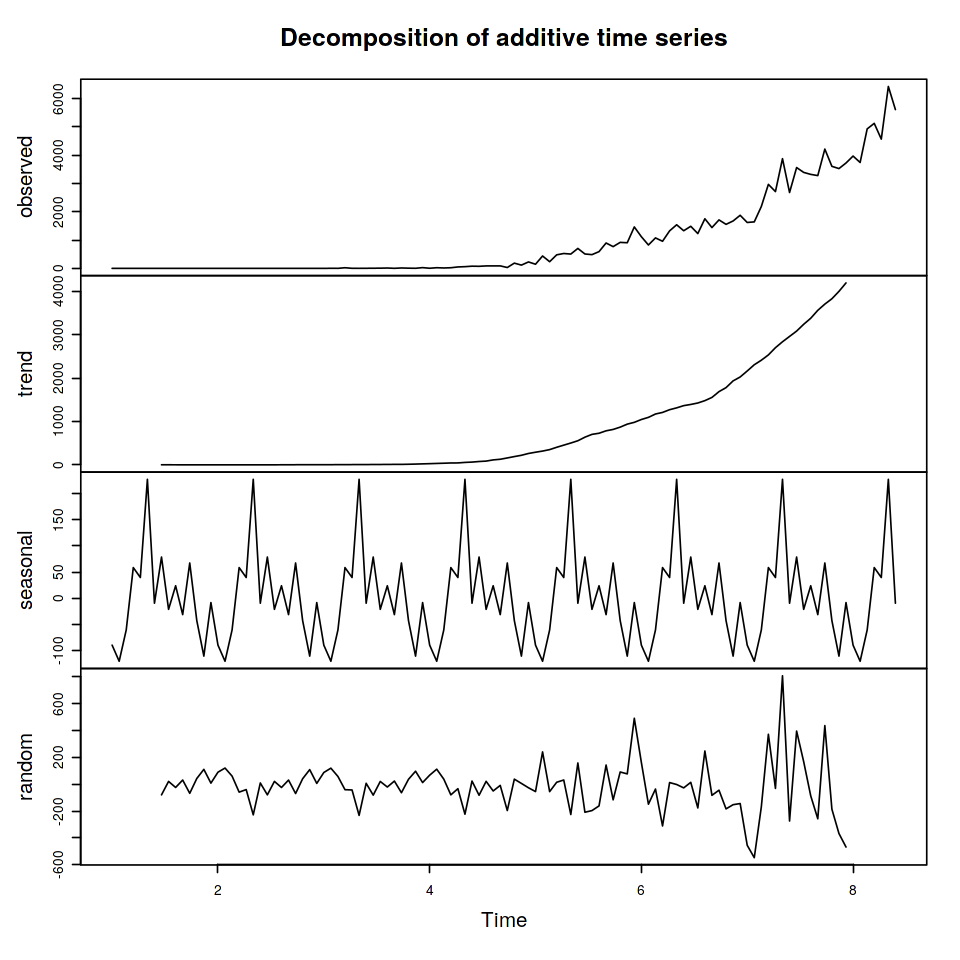

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8)
info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(Date)%>% summarize(cured=sum(Cured),deaths=sum(Deaths),case=sum(Confirmed))

ts.info_cov_india1<-ts(diff(info_cov_india1$case),     
           start = c(1),
           frequency = 15)

decompose.ts.info_cov_india1 <- decompose(ts.info_cov_india1)
plot(decompose.ts.info_cov_india1)

* *If I break the time series in 15-day periods, then there is a definitive seasonality*
* *As this is very small period and I will consider the seasonality so that prediction can be abit more closer*
* *Below is the Series after removing seasonality*

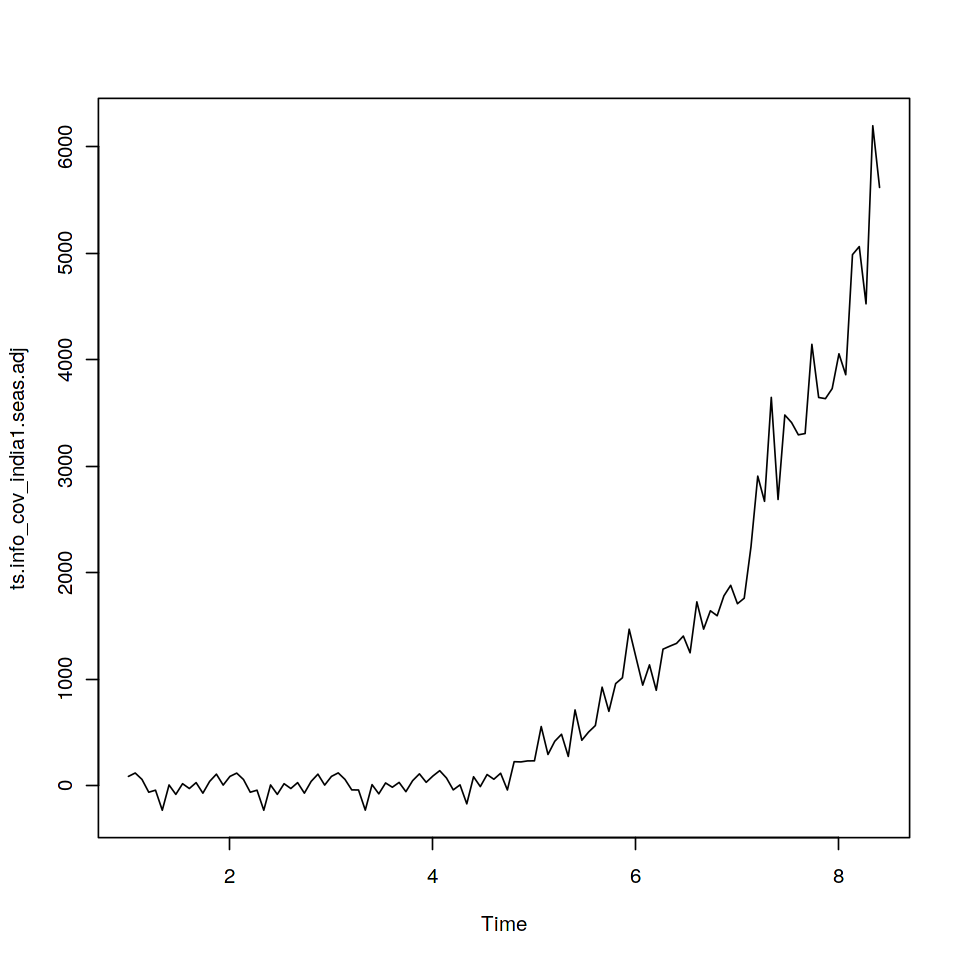

In [15]:
ts.info_cov_india1.seas.adj <- ts.info_cov_india1 - decompose.ts.info_cov_india1$seasonal
plot(ts.info_cov_india1.seas.adj)

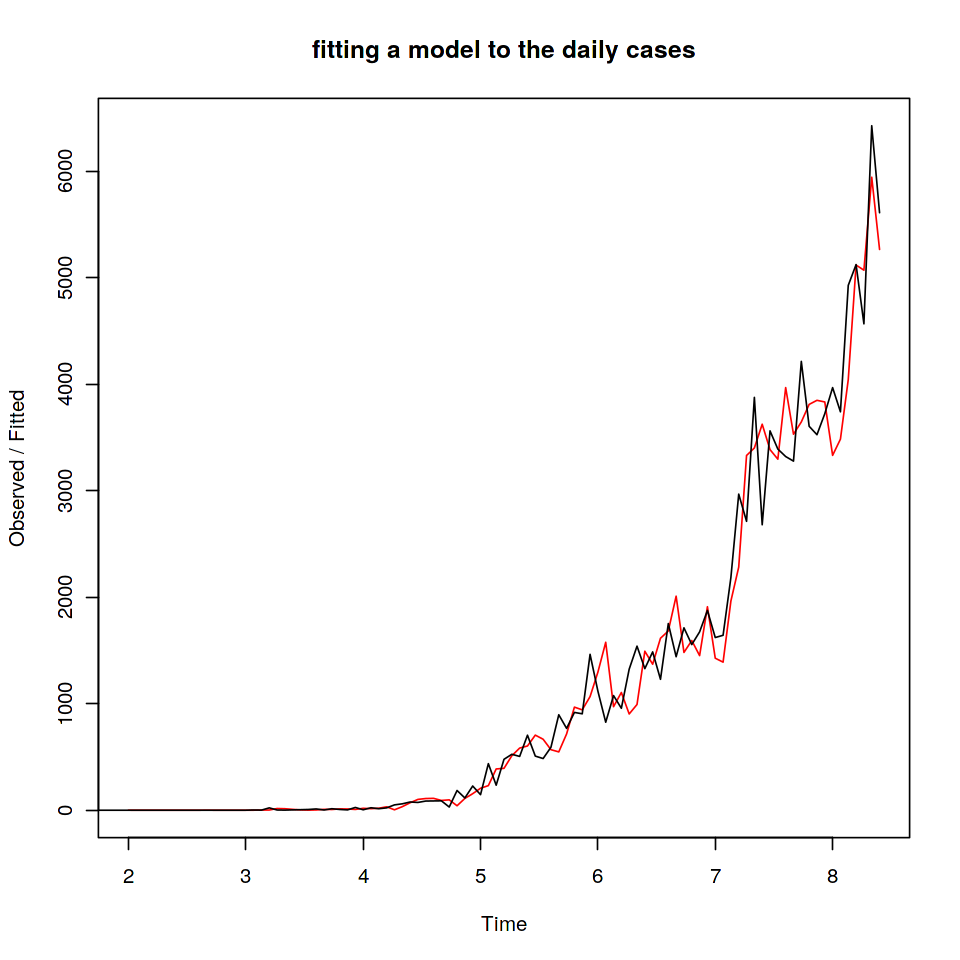

In [16]:
fitted_model<-HoltWinters(ts.info_cov_india1)
plot(fitted_model,main="fitting a model to the daily cases")

* *Lets check the residuals and their plots*


	Box-Ljung test

data:  forecast.India.total.cases$residuals
X-squared = 17.987, df = 20, p-value = 0.5883


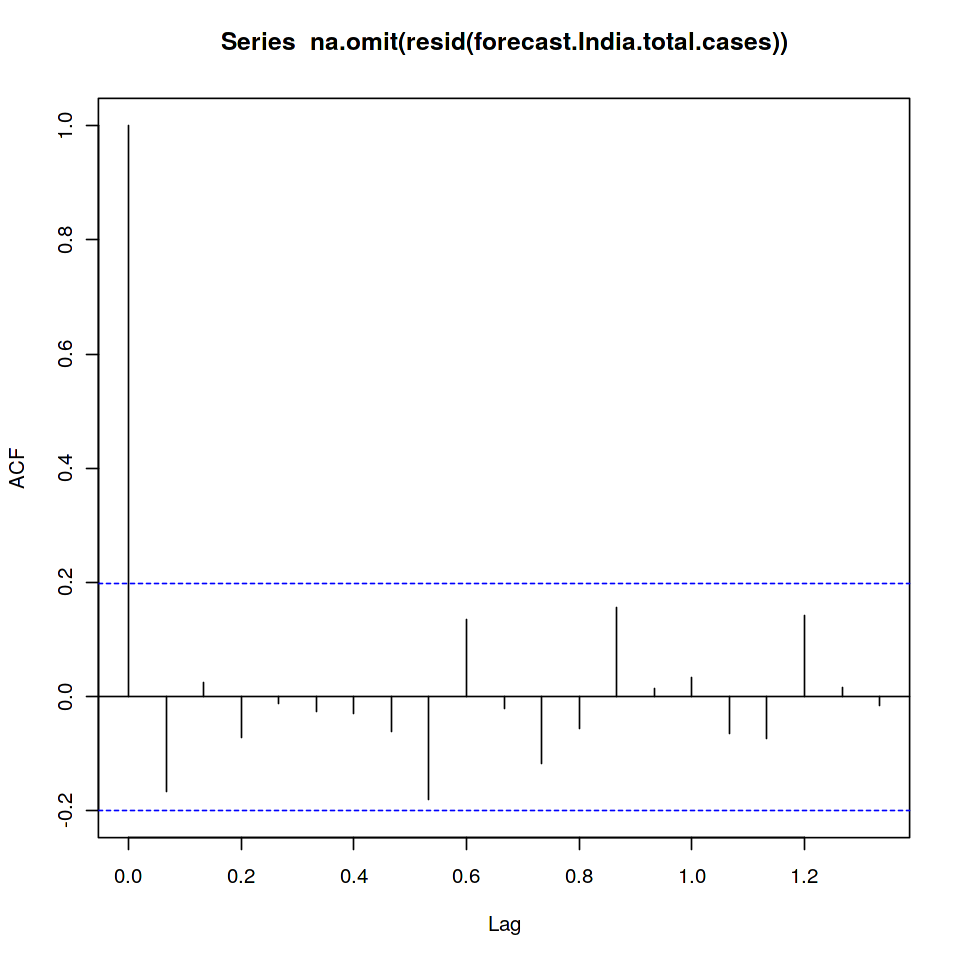

In [17]:

forecast.India.total.cases<-forecast(fitted_model,10)
acf(na.omit(resid(forecast.India.total.cases)), lag.max=20)

Box.test(forecast.India.total.cases$residuals, lag=20, type="Ljung-Box")

* *We ran Ljung-Box test to see the p-value, which is vey significant and we cannot reject the null hypothesis i.e. there is no correlation between errors*
* *Also ran the autocorrelation visualization which shows residuals have no significant correlation left*

*Below is the forecasting graph and the prediction table with 3rd order exponential forecasting model*

Day,Point Forecast
<date>,<dbl>
2020-05-22,6672.715
2020-05-23,6882.088
2020-05-24,7409.045
2020-05-25,8047.659
2020-05-26,9475.052
2020-05-27,9426.242
2020-05-28,10015.495
2020-05-29,10917.696
2020-05-30,11655.024


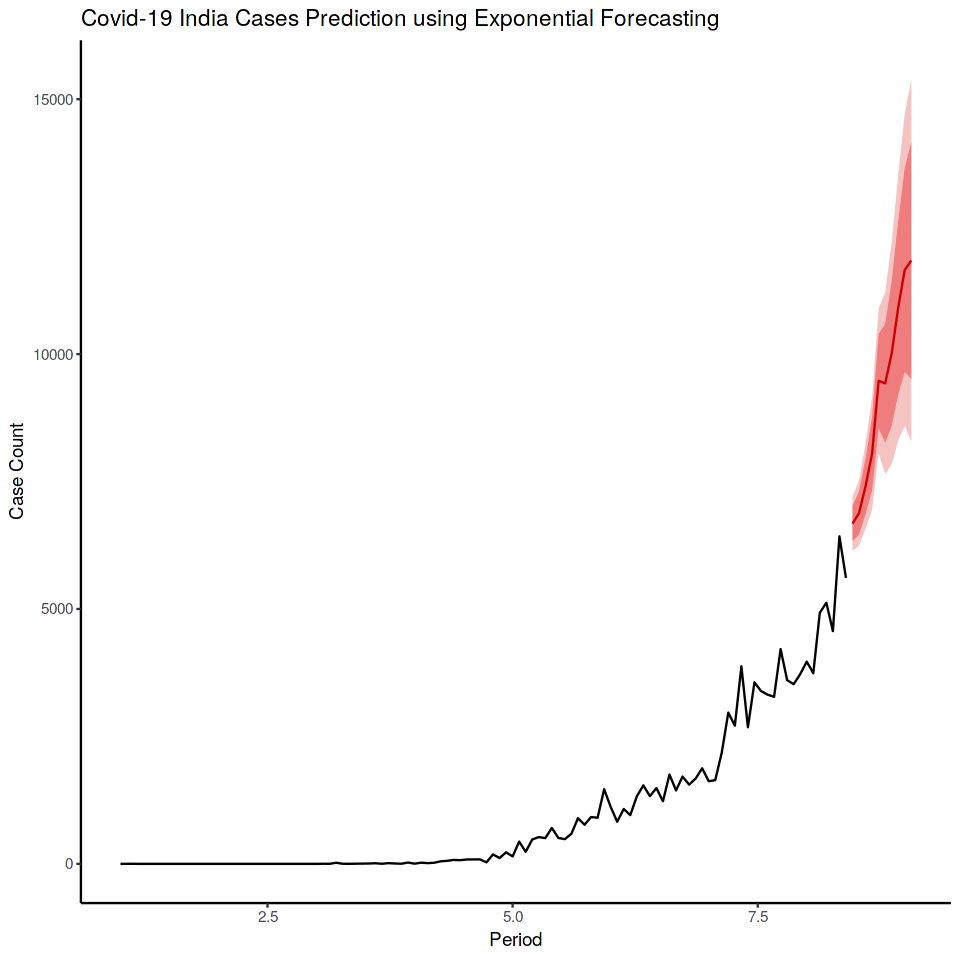

In [18]:
autoplot(forecast.India.total.cases,fcol = "red") + geom_forecast(h=10) + theme_classic()+labs(title="Covid-19 India Cases Prediction using Exponential Forecasting")+xlab("Period")+ylab("Case Count")

given.last.date<-max(info_cov_india1$Date)
given.start.date<-min(info_cov_india1$Date)


#plot(forecast.India.total.cases, xaxt='n',main="Covid-19 India Cases Prediction using Exponential Forecasting",fcol="red")
#axis(1, at=seq(1, as.numeric(given.last.date-given.start.date), by=1), las=2, labels=seq(given.start.date, given.last.date, length.out=as.numeric(given.last.date-given.start.date) ))

forecast.India.total.cases%<>%as_tibble()
forecast.India.total.cases[,"Day"]<-given.last.date+as.numeric(row.names(forecast.India.total.cases))
forecast.India.total.cases<-as.data.frame(forecast.India.total.cases[,c(6,1)])
forecast.India.total.cases


# ARIMA/SARIMA Model Fitting

***Assumtion: Considered 15 day as frequency of time-series***

In [19]:

info_cov_india1<-arrange(info_cov_india,Date)%>%group_by(Date)%>% summarize(cured=sum(Cured),deaths=sum(Deaths),case=sum(Confirmed))

ts.info_cov_india1<-ts(diff(info_cov_india1$case))




*Running Box Test to see if the series has no correlation and series is stationary*

In [20]:
Box.test(ts.info_cov_india1, lag = log(length(ts.info_cov_india1)))


	Box-Pierce test

data:  ts.info_cov_india1
X-squared = 327.2, df = 4.7185, p-value < 2.2e-16


* ***Very low p-value indicates that correlation exsists and series is not stationary***
* ***Lets check the acf to confirm our observation if correation exists between observations***

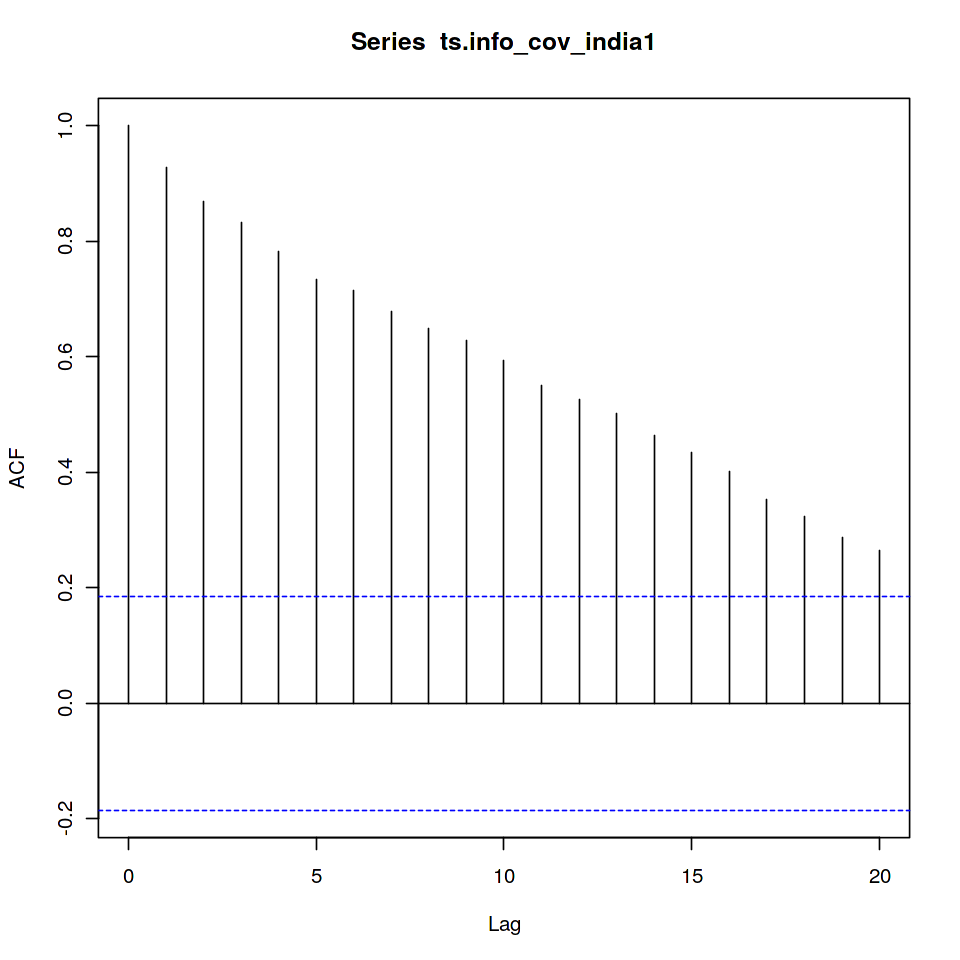

In [21]:
acf(ts.info_cov_india1)

* ***Clearly series is not stationary yet***
* ***Checking the the order of AR and MA part with auto routine using no approximation***

In [22]:
#without approximation
auto.arima(ts.info_cov_india1,ic="aic",approximation=F)

Series: ts.info_cov_india1 
ARIMA(2,2,1) 

Coefficients:
          ar1      ar2      ma1
      -0.7856  -0.2806  -0.8909
s.e.   0.0990   0.1087   0.0499

sigma^2 estimated as 78179:  log likelihood=-776
AIC=1559.99   AICc=1560.37   BIC=1570.79

* ***Auto routine suggesting there is no AR part in the series. Series just contain the MA part***
* ***Lets Validate our observation***

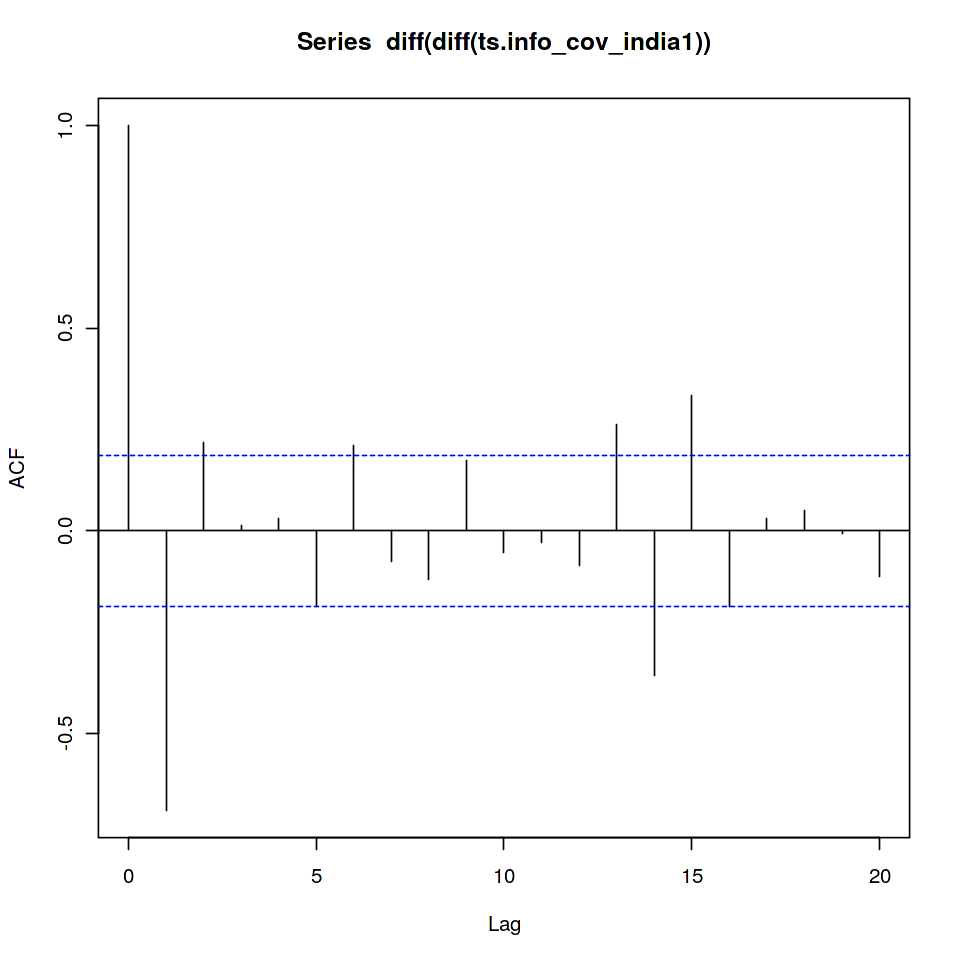

In [23]:
acf(diff(diff(ts.info_cov_india1)))

* There are 2 significant spikes which tells MA part/coeffients will be 2-3
* Lets check the AR part by checking PACF

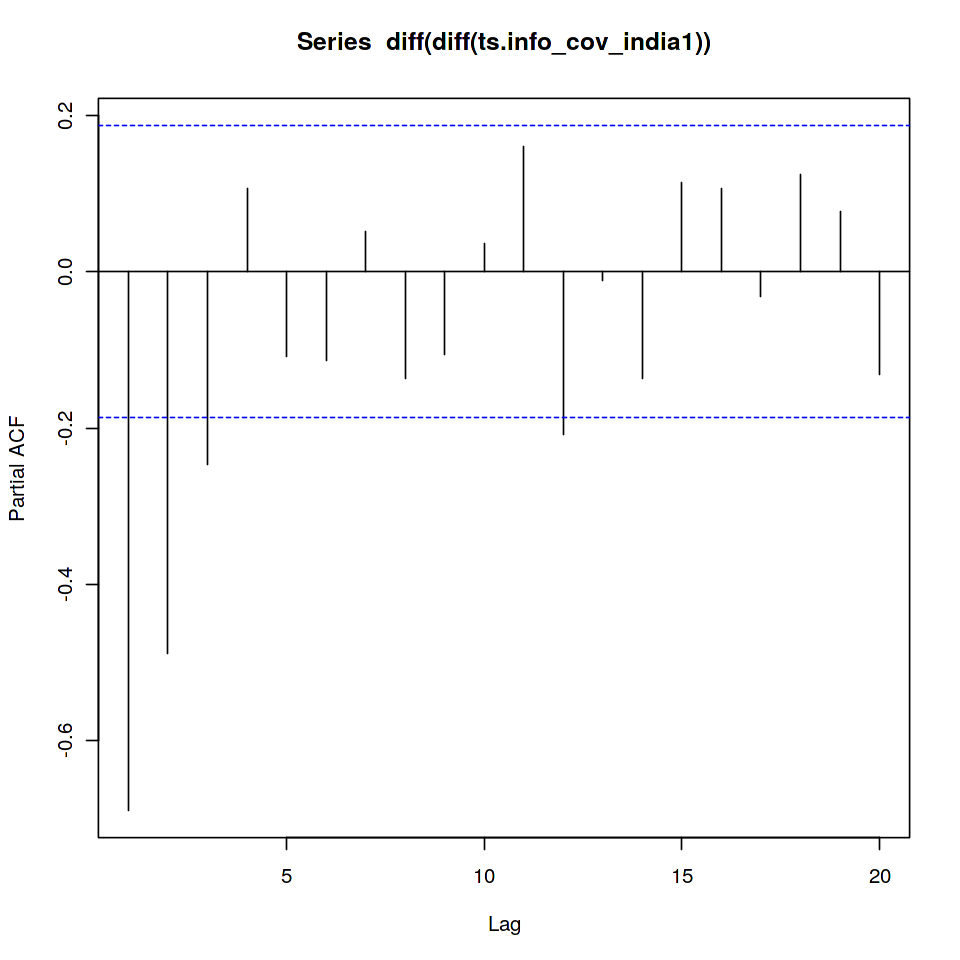

In [24]:
pacf(diff(diff(ts.info_cov_india1)))

* This tells we do have significant PACF for upto 8 lags. 
* Lets run and fit the model now for multiple values of AR and MA parts in the series. We will be taking AIC as the measure to consider best fit model.

In [25]:

d=2
DD=0
#assumption there is seasonality after 15 days
per=15
for(p in 1:5){
  for(q in 1:4){
    for(i in 1:2){
      for(j in 1:1){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=ts.info_cov_india1, order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2) 
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 2 0 0 0 0 15 AIC= 1724.679  SSE= 40764461  p-VALUE= 1.558365e-11 
0 2 0 1 0 0 15 AIC= 1698.643  SSE= 29468814  p-VALUE= 2.765566e-13 
0 2 1 0 0 0 15 AIC= 1609.686  SSE= 13682463  p-VALUE= 9.394963e-08 
0 2 1 1 0 0 15 AIC= 1580.887  SSE= 9712033  p-VALUE= 6.059825e-07 
0 2 2 0 0 0 15 AIC= 1567.524  SSE= 9103099  p-VALUE= 0.157477 
0 2 2 1 0 0 15 AIC= 1541.652  SSE= 6649200  p-VALUE= 0.6328172 
0 2 3 0 0 0 15 AIC= 1561.401  SSE= 8487444  p-VALUE= 0.5880112 
0 2 3 1 0 0 15 AIC= 1540.21  SSE= 6532127  p-VALUE= 0.9818477 
1 2 0 0 0 0 15 AIC= 1633.362  SSE= 17272890  p-VALUE= 1.00281e-08 
1 2 0 1 0 0 15 AIC= 1614.234  SSE= 13526398  p-VALUE= 1.215953e-06 
1 2 1 0 0 0 15 AIC= 1564.34  SSE= 8876823  p-VALUE= 0.06543156 
1 2 1 1 0 0 15 AIC= 1544.264  SSE= 6923892  p-VALUE= 0.1877286 
1 2 2 0 0 0 15 AIC= 1561.936  SSE= 8516681  p-VALUE= 0.5282126 
1 2 2 1 0 0 15 AIC= 1540.386  SSE= 6521818  p-VALUE= 0.9760646 
1 2 3 0 0 0 15 AIC= 1562.141  SSE= 8385155  p-VALUE= 0.6989775 
2 2 0 0 0 0 15 AIC= 

***Based on above output, We are considering 1,2,1,1,0,0,15 as best model***



	Box-Ljung test

data:  forecast.India.total.cases$residuals
X-squared = 38.193, df = 20, p-value = 0.008386


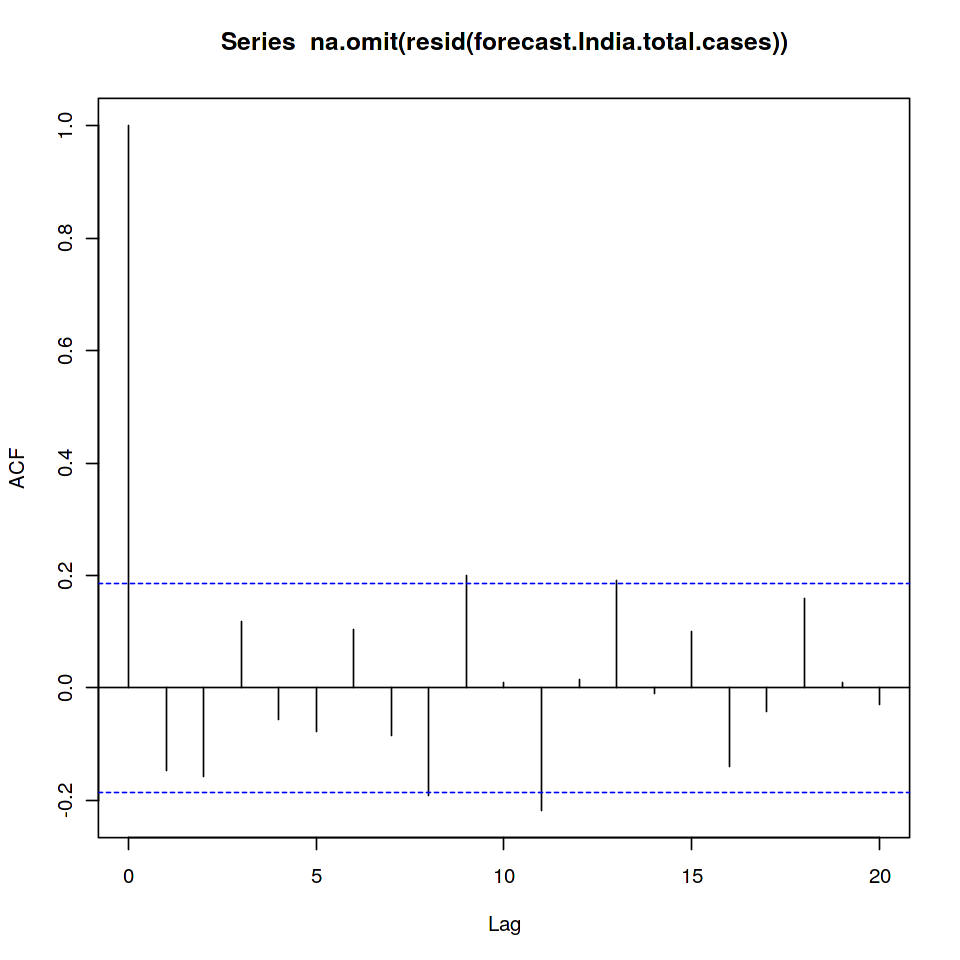

In [26]:
fitted_model<-arima(ts.info_cov_india1,order=c(1,2,1),seasonal = list(order=c(1,0,0), period=per))


forecast.India.total.cases<-forecast(fitted_model,10)
acf(na.omit(resid(forecast.India.total.cases)), lag.max=20)

Box.test(forecast.India.total.cases$residuals, lag=20, type="Ljung-Box")

**Below is the forecasting graph and the prediction table with 3rd order exponential forecasting model****

Day,Point Forecast
<date>,<dbl>
2020-05-22,6339.963
2020-05-23,6267.879
2020-05-24,6371.994
2020-05-25,6424.578
2020-05-26,7061.109
2020-05-27,6813.951
2020-05-28,6874.327
2020-05-29,7082.511
2020-05-30,7321.055


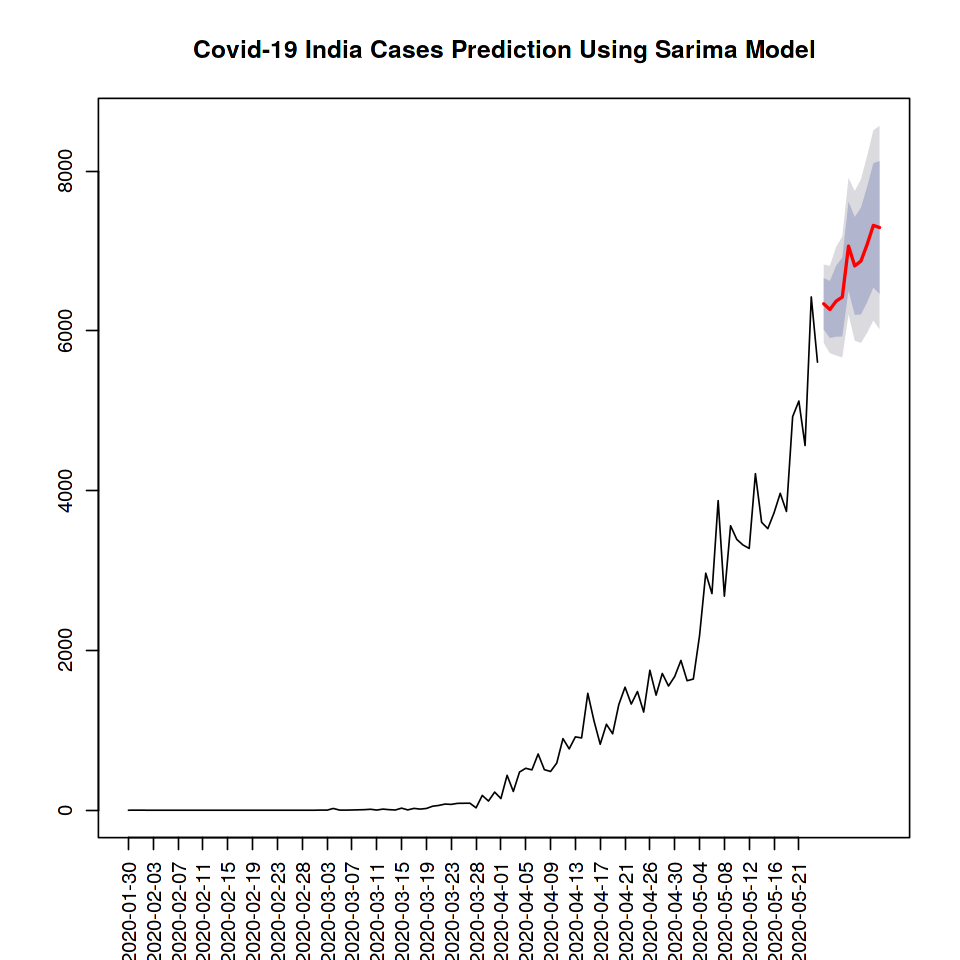

In [27]:
#autoplot(forecast.India.total.cases,fcol = "red") + geom_forecast(h=10) + theme_classic()+labs(title="Covid-19 India Cases Prediction Using Sarima Model")+xlab("Period")+ylab("Case Count")
given.last.date<-max(info_cov_india1$Date)
given.start.date<-min(info_cov_india1$Date)
forecast.India.total.cases<-forecast(fitted_model,10)
plot(forecast.India.total.cases, xaxt='n',main="Covid-19 India Cases Prediction Using Sarima Model",fcol="red")
axis(1, at=seq(1, as.numeric(given.last.date-given.start.date), by=4), las=2, labels=seq(given.start.date, given.last.date, length.out=as.numeric(given.last.date-given.start.date)/4 ))


forecast.India.total.cases%<>%as_tibble()
forecast.India.total.cases[,"Day"]<-given.last.date+as.numeric(row.names(forecast.India.total.cases))
forecast.India.total.cases<-as.data.frame(forecast.India.total.cases[,c(6,1)]) 
forecast.India.total.cases

